# **H1N1  Vaccination Status Prediction**

<img src="images/flu-vaccine.jpg" alt="Sample Image" style="width:1000px; height:440px;">

## **Overview**

This project focuses on predicting whether individuals received H1N1 and seasonal flu vaccines based on information they shared about their backgrounds, opinions, and health behaviors. The data comes from the National 2009 H1N1 Flu Survey conducted during the H1N1 influenza pandemic. The survey included questions about respondents' social, economic, and demographic backgrounds, their opinions on illness risks and vaccine effectiveness, and their behaviors towards mitigating transmission. Understanding how these factors relate to vaccination patterns can inform future public health efforts.

## **Business Problem**
A public health organization is dedicated to improving vaccination rates for both H1N1 and seasonal flu vaccines among the population to mitigate the spread of influenza viruses. Influenza vaccines are crucial for preventing illness, reducing the severity of symptoms, and minimizing the risk of complications, hospitalizations, and deaths associated with influenza infections. However, despite the availability of vaccines, vaccine hesitancy and refusal remain significant barriers to achieving high vaccination coverage rates.

To address this challenge, the organization aims to understand the multifaceted factors influencing individuals' decisions to get vaccinated or refuse vaccination. Leveraging data collected from the National 2009 H1N1 Flu Survey, the organization seeks to develop predictive models that can identify patterns and associations between individuals' backgrounds, opinions, and health behaviors and their likelihood of receiving flu vaccines. Additionally, the organization aims to explore reasons for vaccine hesitancy and refusal, such as concerns about vaccine safety and effectiveness, mistrust in healthcare authorities, misconceptions about influenza risks, and cultural or socioeconomic barriers to accessing vaccination services.

By gaining insights into these complex dynamics, the organization intends to tailor targeted interventions and public health campaigns to address specific barriers to vaccination uptake and effectively communicate the importance of vaccination. Ultimately, the goal is to increase vaccination acceptance, build trust in vaccination programs, and enhance community resilience against influenza outbreaks, thereby reducing the burden of influenza-related morbidity and mortality.


## **Data Understanding**

The dataset utilized in this project originates from the NHFS National Flu Survey conducted in 2009. It captures responses from approximately 26,000 individuals regarding their vaccination status for both seasonal flu and H1N1 flu. Additionally, the survey collects information on demographic, behavioral, and health factors of the respondents.

For this particular project, the target variable selected is the H1N1 vaccination rate. All features available in the survey are used for analysis. 

- **training_set_features.csv:** This dataset contains the features (independent variables) for the training set. Each row represents a sample, and each column represents a feature.

- **training_set_labels.csv:** This dataset contains the corresponding labels (target variables) for the training set features. Each label indicates whether the respondent received the seasonal flu vaccine or the H1N1 flu vaccine.

- **test_set_features.csv:** This dataset contains the features similar to the training set features but without the corresponding labels. This dataset is used to make predictions after training the model.

---
Summary of features in this dataset:
---

**Respondent Information:** This includes demographic details such as age group, education, race, sex, income level, marital status, housing situation, employment status, geographic region, residence within metropolitan statistical areas, number of adults and children in the household, employment industry, and occupation.

**Vaccination Status:** The dataset captures whether respondents received the seasonal flu vaccine or the H1N1 flu vaccine.

**Health Factors:** Information about health conditions such as chronic medical conditions, regular close contact with young children, and whether the respondent is a healthcare worker.

**Behavioral Factors:** This includes various behaviors related to flu prevention, such as taking antiviral medications, avoiding close contact with flu-like symptoms, wearing face masks, washing hands frequently, reducing time at large gatherings, reducing contact with people outside of the household, and avoiding touching the face.

**Opinions and Concerns:** Data on respondents' opinions and concerns regarding the effectiveness and risks associated with H1N1 and seasonal flu vaccines.

**Knowledge Level:** Information on respondents' level of concern and knowledge about the H1N1 flu.

In [71]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report, roc_curve, auc
from sklearn.experimental import enable_iterative_imputer  # explicitly enable IterativeImputer
from sklearn.impute import IterativeImputer
import xgboost as xgb
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Define hospital-themed colors
hospital_colors = ['#0F3352', '#00A79D', '#800000', '#FF4500', '#ADD8E6',
                   '#90EE90', '#808080', '#D3D3D3', '#008080', '#E6E6FA']

# Set the color cycle to use hospital-themed colors
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=hospital_colors)

Reading the training_set_features.csv dataset

In [3]:
# Reading in the feature data
dataFeatures = pd.read_csv("Data/training_set_features.csv")
dataFeatures.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
dataFeatures.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

Reading the training_set_labels.csv dataset

In [5]:
# Reading in the target data
dataLabel = pd.read_csv('Data/training_set_labels.csv')
dataLabel.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


### Viewing class imbalance in the target class

Seasonal Vacccine Status


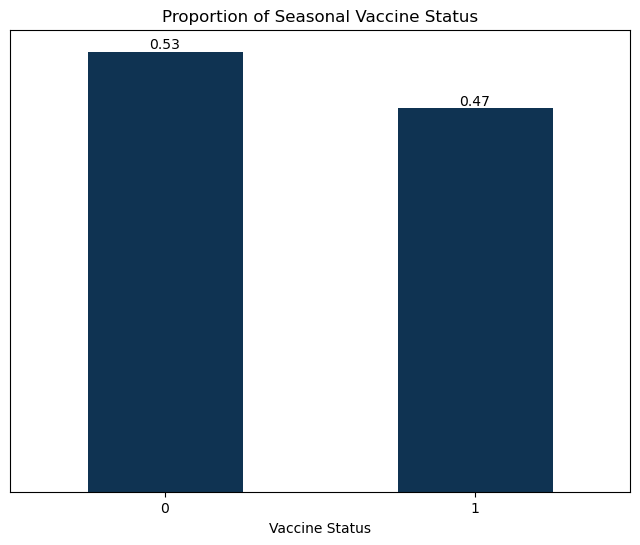

In [6]:
# Plotting the bar plot
plt.figure(figsize=(8, 6))
ax = dataLabel['seasonal_vaccine'].value_counts(normalize=True).plot(kind='bar')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Customize plot appearance
plt.title('Proportion of Seasonal Vaccine Status')
plt.xlabel('Vaccine Status')
plt.ylabel('')
plt.xticks(rotation=0)
plt.yticks([])  # Remove values from y-axis
# Save the plot as an image
plt.savefig('images/seasonal_vaccine_proportion.png')
plt.show()

H1N1 Vaccine Status

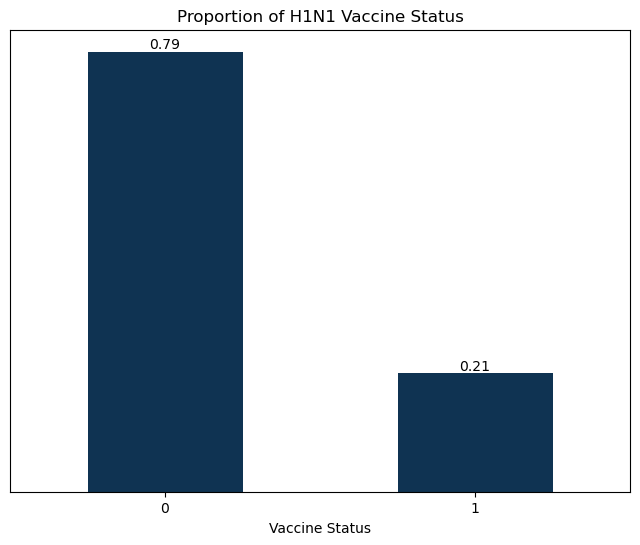

In [7]:
# Plotting the bar plot
plt.figure(figsize=(8, 6))
ax = dataLabel['h1n1_vaccine'].value_counts(normalize=True).plot(kind='bar')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Customize plot appearance
plt.title('Proportion of H1N1 Vaccine Status')
plt.xlabel('Vaccine Status')
plt.ylabel('')
plt.xticks(rotation=0)
plt.yticks([])  # Remove values from y-axis
plt.savefig('images/H1N1_vaccine_proportion.png')
plt.show()

The H1N1 is imbalance

Dropping the seasonal vaccine because most of our features relates to h1n1 vaccine target

In [8]:
dataLabel.drop(columns=['seasonal_vaccine'], inplace=True)

Merging the both datasets

In [9]:
# Merging feature and target data
mergedData = dataFeatures.merge(dataLabel, how='left', on='respondent_id')
mergedData.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0


In [10]:
mergedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [11]:
mergedData.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

Dropping columns with alot of missing values also with redudant and non contributory features

In [12]:
# close to half the values of these columns are NULL so discarding
mergedData.drop(['health_insurance','employment_industry','employment_occupation', 'respondent_id', 'child_under_6_months','opinion_h1n1_sick_from_vacc','opinion_seas_sick_from_vacc','behavioral_large_gatherings', 'behavioral_outside_home','marital_status',
           'behavioral_avoidance','behavioral_face_mask','employment_status','education','census_msa'],axis=1,inplace = True)

In [13]:
mergedData.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_wash_hands,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_seas_vacc_effective,opinion_seas_risk,household_adults,household_children,h1n1_vaccine
count,26615.000000,26591.000000,26636.000000,26665.000000,26579.000000,24547.000000,24547.000000,25736.000000,25903.000000,26316.000000,26319.000000,26245.000000,26193.000000,26458.000000,26458.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.825614,0.677264,0.220312,0.329735,0.283261,0.111918,3.850623,2.342566,4.025986,2.719162,0.886499,0.534583,0.212454
std,0.910311,0.618149,0.215545,0.379448,0.467531,0.414466,0.470126,0.450591,0.315271,1.007436,1.285539,1.086565,1.385055,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,4.000000,2.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,5.000000,4.000000,5.000000,4.000000,1.000000,1.000000,0.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [14]:
mergedData.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_wash_hands', 'behavioral_touch_face', 'doctor_recc_h1n1',
       'doctor_recc_seasonal', 'chronic_med_condition', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_seas_vacc_effective', 'opinion_seas_risk', 'age_group', 'race',
       'sex', 'income_poverty', 'rent_or_own', 'hhs_geo_region',
       'household_adults', 'household_children', 'h1n1_vaccine'],
      dtype='object')

### **EDA**

####  Distribution of Numerical features

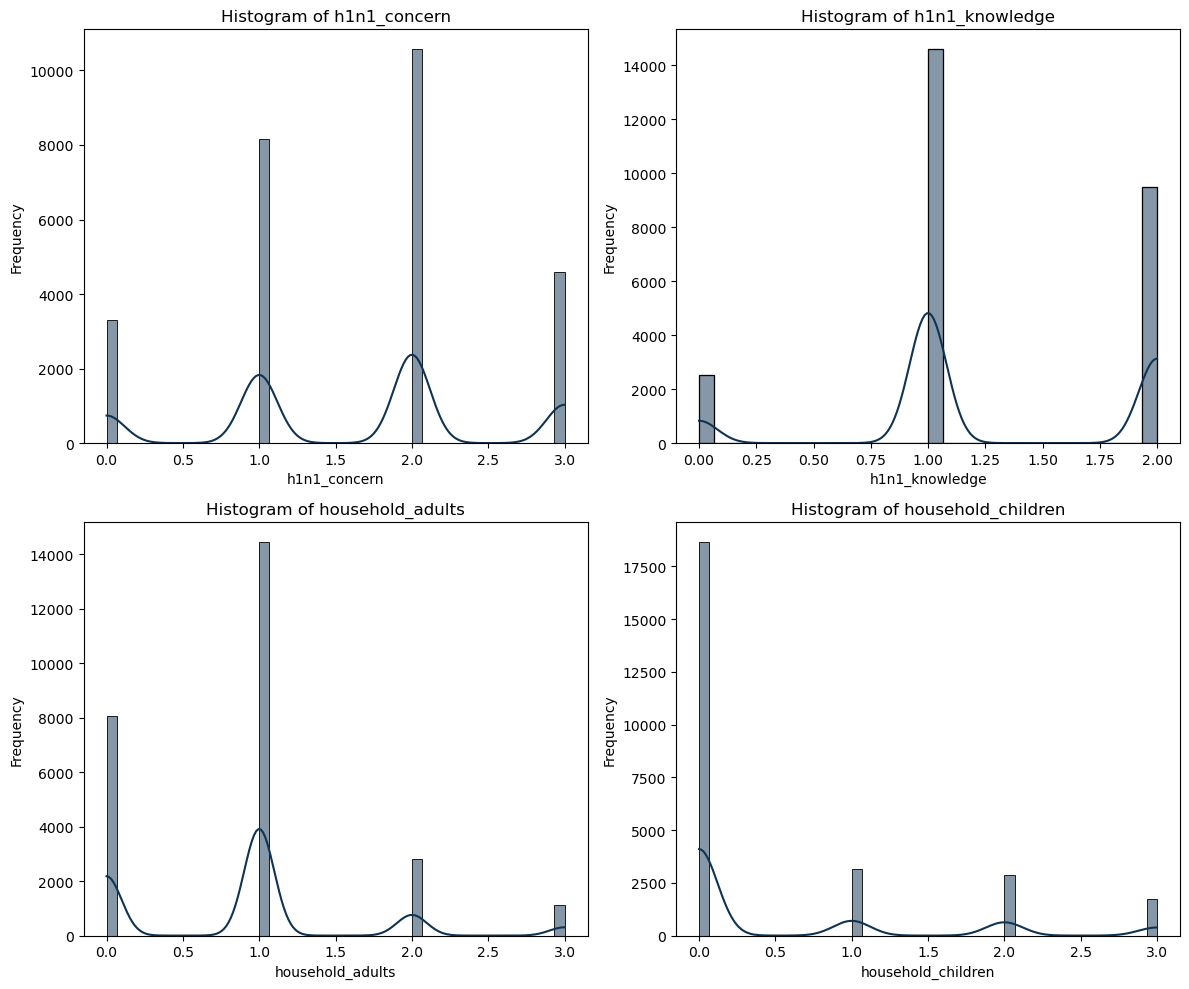

In [15]:
# List of numerical features
numerical_features = ['h1n1_concern', 'h1n1_knowledge', 'household_adults', 'household_children']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create histograms for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.histplot(mergedData[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap of labels
plt.tight_layout()

plt.savefig('images/numericalfeaturesdist.png')
# Show the plot
plt.show()

Viewing the categorical features in the dataset

In [16]:
str_cols = mergedData.select_dtypes(include = 'object').columns
mergedData[str_cols].head()

,age_group,race,sex,income_poverty,rent_or_own,hhs_geo_region
0,55 - 64 Years,White,Female,Below Poverty,Own,oxchjgsf
1,35 - 44 Years,White,Male,Below Poverty,Rent,bhuqouqj
2,18 - 34 Years,White,Male,"<= $75,000, Above Poverty",Own,qufhixun
3,65+ Years,White,Female,Below Poverty,Rent,lrircsnp
4,45 - 54 Years,White,Female,"<= $75,000, Above Poverty",Own,qufhixun


Viewing their distribution 

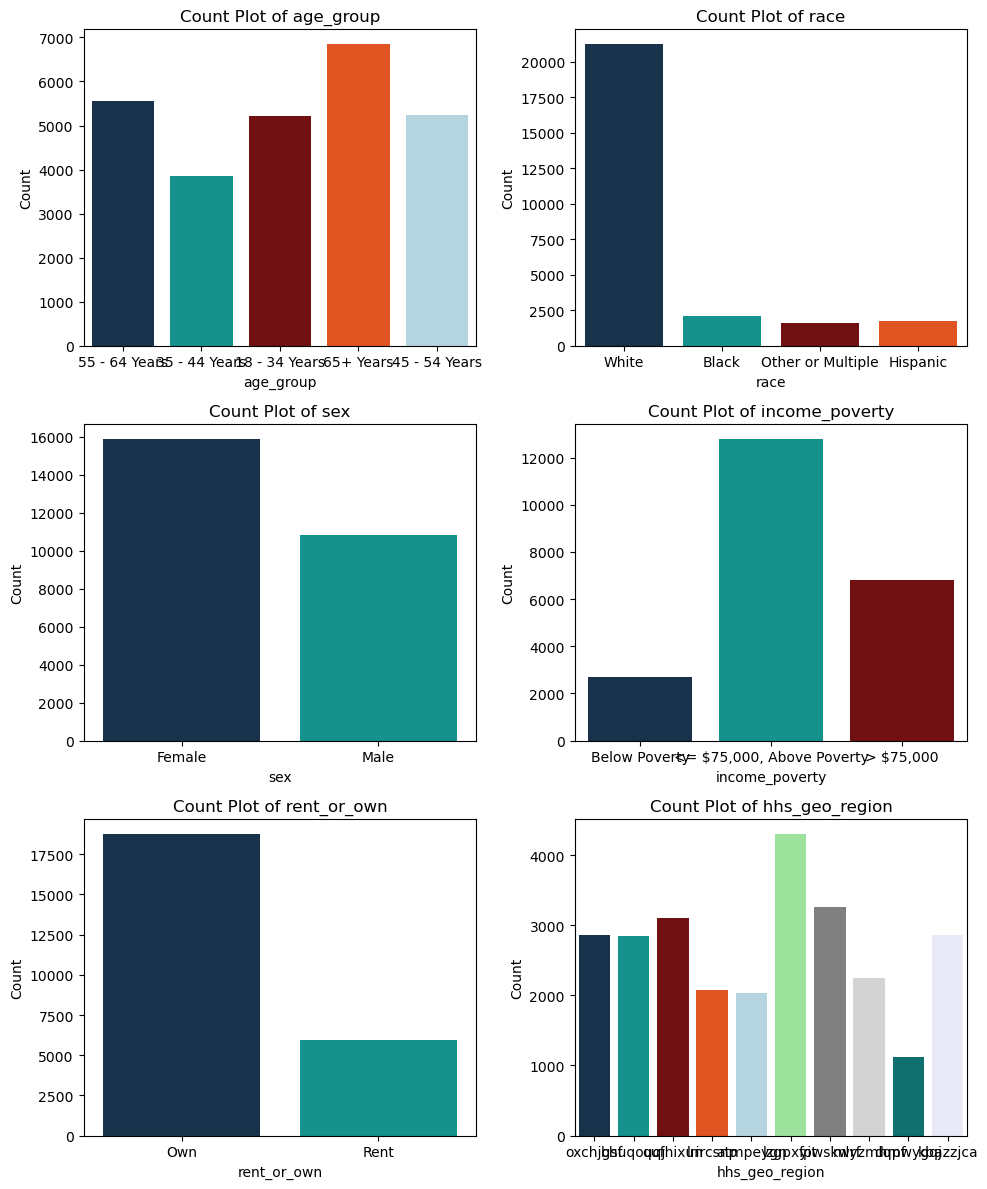

In [17]:
# List of categorical features
categorical_features = ['age_group', 'race', 'sex', 'income_poverty', 
                         'rent_or_own','hhs_geo_region']

# Create subplots for categorical features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))
axes = axes.flatten()

# Create count plots for categorical features
for i, feature in enumerate(categorical_features):
    sns.countplot(data=mergedData, x=feature, ax=axes[i])
    axes[i].set_title(f'Count Plot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Adjust layout to prevent overlap of labels
plt.tight_layout()

plt.savefig('images/categoricaldist.png')
# Show the plot for categorical features
plt.show()

Handling missing values by filling in missing values with the median for numeric columns and the mode for categorical columns.

In [18]:
# All the NULL values are populated with the mode
for col in mergedData.columns:
    if mergedData[col].isnull().sum() and mergedData[col].dtypes != 'object':
        mergedData[col].loc[(dataFeatures[col].isnull())] = mergedData[col].median()
for col in mergedData.columns:
    if mergedData[col].isnull().sum() and mergedData[col].dtypes == 'object':
        mergedData[col].loc[(mergedData[col].isnull())] = mergedData[col].mode().max()

In [19]:
mergedData.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_wash_hands          0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
age_group                      0
race                           0
sex                            0
income_poverty                 0
rent_or_own                    0
hhs_geo_region                 0
household_adults               0
household_children             0
h1n1_vaccine                   0
dtype: int64

## **Parameters based on general research for vaccincation**

**Individuals Vaccinated by Age Group**

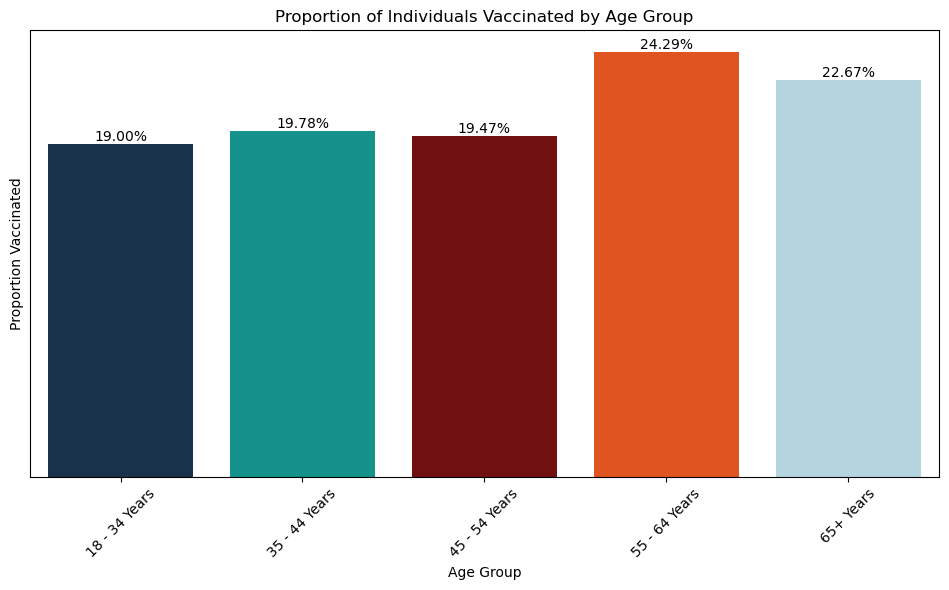

In [20]:
# Calculate the proportion of vaccinated individuals in each age group
vaccinated_by_age = mergedData.groupby('age_group')['h1n1_vaccine'].mean()

# Sort the vaccinated_by_age Series by index in ascending order
vaccinated_by_age_sorted = vaccinated_by_age.sort_index()

# Plot the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=vaccinated_by_age_sorted.index, y=vaccinated_by_age_sorted.values)
plt.title('Proportion of Individuals Vaccinated by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion Vaccinated')
plt.xticks(rotation=45)
plt.tight_layout()

# Add values on top of the bars in percentage format
for idx, value in enumerate(vaccinated_by_age_sorted.values):
    bar_plot.text(idx, value, '{:.2%}'.format(value), ha="center", va="bottom")

# Remove y-axis values
plt.gca().axes.yaxis.set_ticks([])

plt.savefig('images/agegroup.png')
plt.show()

**Vaccination Rates by Age Group:** The proportion of individuals vaccinated against H1N1 varies across different age groups. For example, younger age groups such as "18 - 34 Years" have a lower vaccination rate compared to older age groups like "55+ Years."

Age appears to be a significant factor influencing vaccination decisions. Older age groups tend to have higher vaccination rates compared to younger age groups. This could be due to factors such as increased susceptibility to the virus or higher awareness among older individuals about the benefits of vaccination.

## **Number of Children in household**

**0.0:** No children

**1.0:** 1 child

**2.0:** 2 children

**3.0:** 3 children

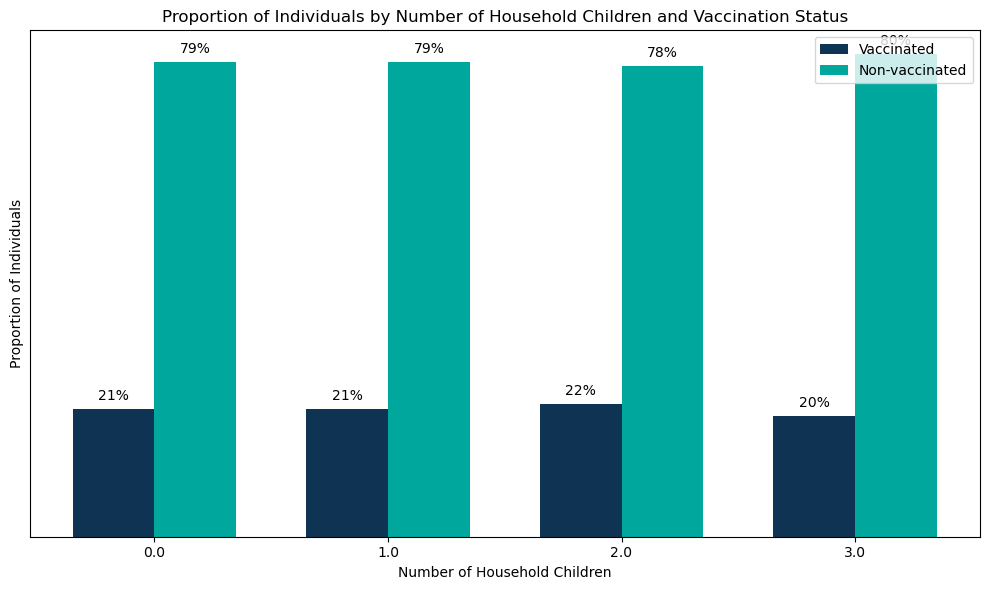

In [21]:
# Calculate the proportion of vaccinated individuals for each number of household children
vaccinated_by_children = mergedData.groupby('household_children')['h1n1_vaccine'].mean()

# Calculate the proportion of non-vaccinated individuals for each number of household children
non_vaccinated_by_children = 1 - vaccinated_by_children

# Sort the vaccinated_by_children Series by index in ascending order
vaccinated_by_children_sorted = vaccinated_by_children.sort_index()
non_vaccinated_by_children_sorted = non_vaccinated_by_children.sort_index()

# Plotting side by side bars
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(vaccinated_by_children_sorted.index))

# Plotting vaccinated individuals
plt.bar(index, vaccinated_by_children_sorted.values, bar_width, label='Vaccinated')

# Plotting non-vaccinated individuals beside vaccinated individuals
plt.bar(index + bar_width, non_vaccinated_by_children_sorted.values, bar_width, label='Non-vaccinated')

# Adding labels and title
plt.title('Proportion of Individuals by Number of Household Children and Vaccination Status')
plt.xlabel('Number of Household Children')
plt.ylabel('Proportion of Individuals')
plt.xticks(index + bar_width / 2, vaccinated_by_children_sorted.index)  # Adjusting x ticks
plt.legend()

# Adding percentage values on top of the bars
for i, (vacc, non_vacc) in enumerate(zip(vaccinated_by_children_sorted.values, non_vaccinated_by_children_sorted.values)):
    plt.text(i, vacc + 0.01, '{:.0%}'.format(vacc), ha="center", va="bottom", color='black', fontsize=10)
    plt.text(i + bar_width, non_vacc + 0.01, '{:.0%}'.format(non_vacc), ha="center", va="bottom", color='black', fontsize=10)

# Remove y-axis
plt.gca().axes.yaxis.set_ticks([])

plt.tight_layout()

plt.savefig('images/childrenNo.png')
# Show plot
plt.show()

**No Children in Household (0.0):** 
About 21.26% of individuals with no children in their household were vaccinated against H1N1, while approximately 78.74% were not vaccinated.

**1 Child in Household (1.0):** 
Approximately 21.23% of individuals with one child in their household were vaccinated against H1N1, while around 78.77% were not vaccinated.

**2 Children in Household (2.0):** About 21.96% of individuals with two children in their household were vaccinated against H1N1, while approximately 78.04% were not vaccinated.

**3 Children in Household (3.0):** Approximately 19.98% of individuals with three children in their household were vaccinated against H1N1, while around 80.02% were not vaccinated.

From these results, it appears that the proportion of vaccinated individuals slightly decreases with an increase in the number of children in the household. However, the differences in vaccination rates across different household compositions are relatively small.

### **Gender**
male

female

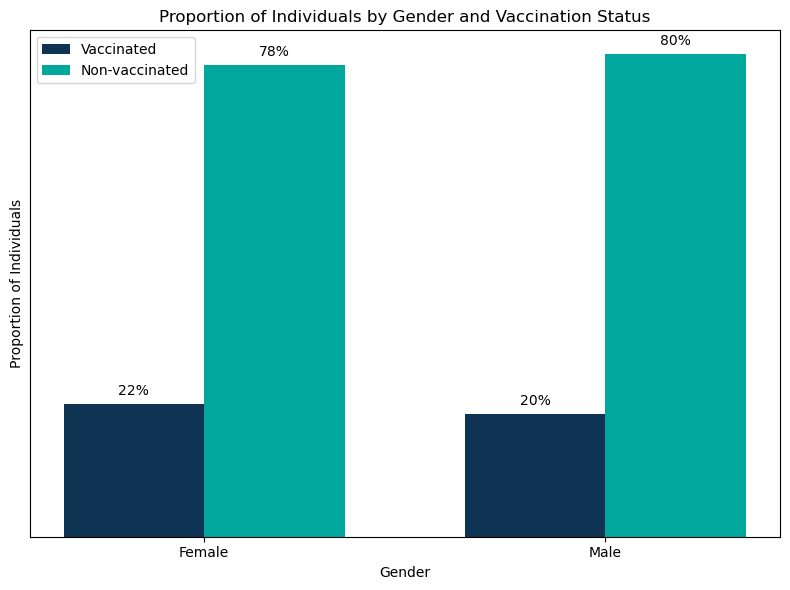

In [22]:
# Calculate the proportion of vaccinated individuals by gender
vaccinated_by_gender = mergedData.groupby('sex')['h1n1_vaccine'].mean()

# Calculate the proportion of non-vaccinated individuals by gender
non_vaccinated_by_gender = 1 - vaccinated_by_gender

# Plotting side by side bars
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(vaccinated_by_gender.index))

# Plotting vaccinated individuals
plt.bar(index, vaccinated_by_gender.values, bar_width, label='Vaccinated')

# Plotting non-vaccinated individuals beside vaccinated individuals
plt.bar(index + bar_width, non_vaccinated_by_gender.values, bar_width, label='Non-vaccinated')

# Adding labels and title
plt.title('Proportion of Individuals by Gender and Vaccination Status')
plt.xlabel('Gender')
plt.ylabel('Proportion of Individuals')
plt.xticks(index + bar_width / 2, vaccinated_by_gender.index)  # Adjusting x ticks
plt.legend()

# Adding percentage values on top of the bars
for i, (vacc, non_vacc) in enumerate(zip(vaccinated_by_gender.values, non_vaccinated_by_gender.values)):
    plt.text(i, vacc + 0.01, '{:.0%}'.format(vacc), ha="center", va="bottom", color='black', fontsize=10)
    plt.text(i + bar_width, non_vacc + 0.01, '{:.0%}'.format(non_vacc), ha="center", va="bottom", color='black', fontsize=10)

# Remove y-axis
plt.gca().axes.yaxis.set_ticks([])

plt.tight_layout()

plt.savefig('images/gender.png')
# Show plot
plt.show()

Overall Vaccination Rates: Both males and females show relatively similar proportions of receiving the H1N1 vaccine, with slightly more females vaccinated compared to males.

Gender Differences: While the overall proportions are similar, there might be a slight difference in vaccination rates between males and females. However, this difference is not substantial.

Potential Factors: The observed differences in vaccination rates between males and females could be influenced by various factors such as access to healthcare, perceived susceptibility to the H1N1 virus, socioeconomic status, or attitudes towards vaccination.

### **Proportion of Individuals by Opinion about Vaccine and Vaccination Status**

**Effectiveness Perception:**
Respondents' opinions about the effectiveness of the H1N1 vaccine are categorized into five levels, ranging from 1 (Not at all effective) to 5 (Very effective).

**Vaccination Status:** 
The proportions of individuals who received (1) or did not receive (0) the H1N1 vaccine.

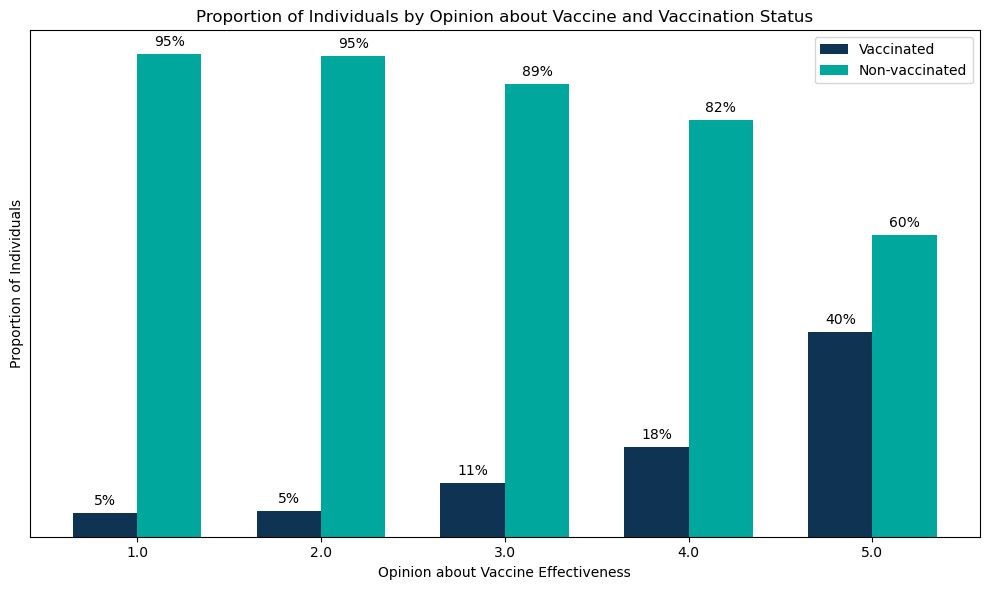

In [23]:
# Calculate the proportion of vaccinated individuals by opinion about the vaccine
vaccinated_by_opinion = mergedData.groupby('opinion_h1n1_vacc_effective')['h1n1_vaccine'].mean()

# Calculate the proportion of non-vaccinated individuals by opinion about the vaccine
non_vaccinated_by_opinion = 1 - vaccinated_by_opinion

# Plotting side by side bars
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(vaccinated_by_opinion.index))

# Plotting vaccinated individuals
plt.bar(index, vaccinated_by_opinion.values, bar_width, label='Vaccinated')

# Plotting non-vaccinated individuals beside vaccinated individuals
plt.bar(index + bar_width, non_vaccinated_by_opinion.values, bar_width, label='Non-vaccinated')

# Adding labels and title
plt.title('Proportion of Individuals by Opinion about Vaccine and Vaccination Status')
plt.xlabel('Opinion about Vaccine Effectiveness')
plt.ylabel('Proportion of Individuals')
plt.xticks(index + bar_width / 2, vaccinated_by_opinion.index)  # Adjusting x ticks
plt.legend()

# Adding percentage values on top of the bars
for i, (vacc, non_vacc) in enumerate(zip(vaccinated_by_opinion.values, non_vaccinated_by_opinion.values)):
    plt.text(i, vacc + 0.01, '{:.0%}'.format(vacc), ha="center", va="bottom", color='black', fontsize=10)
    plt.text(i + bar_width, non_vacc + 0.01, '{:.0%}'.format(non_vacc), ha="center", va="bottom", color='black', fontsize=10)

# Remove y-axis
plt.gca().axes.yaxis.set_ticks([])

plt.tight_layout()

plt.savefig('images/opinion.png')
# Show plot
plt.show()

**Low Perception of Effectiveness:** Respondents who rated the vaccine as not effective (level 1) or not very effective (level 2) exhibit a high proportion of non-vaccination, with over 94.86% and 94.81% respectively choosing not to receive the vaccine.

**Moderate Perception of Effectiveness:** Those with moderate perceptions of vaccine effectiveness (level 3) also tend to have a higher likelihood of vaccination compared to the low perception groups, with approximately 10.57% of them opting for vaccination.

**High Perception of Effectiveness:** Respondents who perceived the vaccine as somewhat effective (level 4) or very effective (level 5) show a substantial increase in vaccination rates, with approximately 17.70% and 40.48% respectively choosing to receive the vaccine.

Overall, these findings underscore the significant influence of individuals' perceptions regarding vaccine effectiveness on their vaccination decisions. As perceived effectiveness increases, there is a corresponding increase in the likelihood of vaccination, highlighting the importance of addressing public perceptions and beliefs in promoting vaccination uptake and public health initiatives.

### **Proportion of Individuals by Doctor Recommendation and Vaccination Status**

**Doctor Recommendation:** Respondents are categorized based on whether they received a recommendation from a doctor for the H1N1 vaccine. A value of 0 indicates no recommendation, while 1 indicates a recommendation from a doctor.

**Vaccination Status:** The proportions of individuals who received (1) or did not receive (0) the H1N1 vaccine.

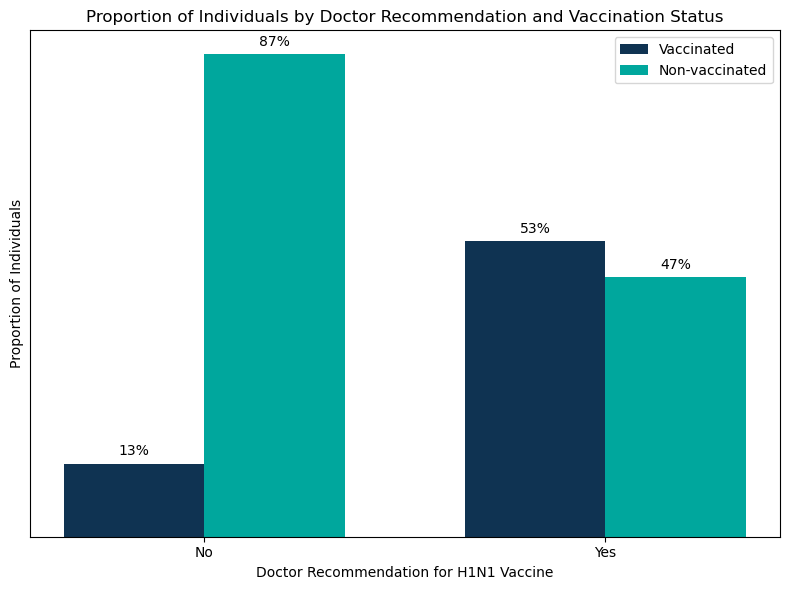

In [24]:
# Calculate the proportion of vaccinated individuals by doctor recommendation
vaccinated_by_doctor_recommendation = mergedData.groupby('doctor_recc_h1n1')['h1n1_vaccine'].mean()

# Calculate the proportion of non-vaccinated individuals by doctor recommendation
non_vaccinated_by_doctor_recommendation = 1 - vaccinated_by_doctor_recommendation

# Plotting side by side bars
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(vaccinated_by_doctor_recommendation.index))

# Plotting vaccinated individuals
plt.bar(index, vaccinated_by_doctor_recommendation.values, bar_width, label='Vaccinated')

# Plotting non-vaccinated individuals beside vaccinated individuals
plt.bar(index + bar_width, non_vaccinated_by_doctor_recommendation.values, bar_width, label='Non-vaccinated')

# Adding labels and title
plt.title('Proportion of Individuals by Doctor Recommendation and Vaccination Status')
plt.xlabel('Doctor Recommendation for H1N1 Vaccine')
plt.ylabel('Proportion of Individuals')
plt.xticks(index + bar_width / 2, ['No', 'Yes'])  # Adjusting x ticks
plt.legend()

# Adding percentage values on top of the bars
for i, (vacc, non_vacc) in enumerate(zip(vaccinated_by_doctor_recommendation.values, non_vaccinated_by_doctor_recommendation.values)):
    plt.text(i, vacc + 0.01, '{:.0%}'.format(vacc), ha="center", va="bottom", color='black', fontsize=10)
    plt.text(i + bar_width, non_vacc + 0.01, '{:.0%}'.format(non_vacc), ha="center", va="bottom", color='black', fontsize=10)

# Remove y-axis
plt.gca().axes.yaxis.set_ticks([])

plt.tight_layout()

plt.savefig('images/doctorrecc.png')
# Show plot
plt.show()

**No Doctor Recommendation:** Respondents who did not receive a recommendation from a doctor for the H1N1 vaccine (0.0) predominantly chose not to get vaccinated, with approximately 86.88% opting against vaccination.

**Doctor Recommendation:** In contrast, respondents who received a recommendation from a doctor for the H1N1 vaccine (1.0) exhibit a higher likelihood of vaccination, with approximately 53.24% opting to receive the vaccine.

These findings underscore the influential role of healthcare professionals in vaccination decisions. When doctors recommend the H1N1 vaccine, there is a notable increase in vaccination uptake among respondents. This highlights the importance of healthcare provider recommendations in promoting vaccination and suggests that healthcare professionals play a crucial role in shaping public health behaviors and attitudes towards vaccination.

### **Proportion of Individuals by Degree of Awareness and Vaccination Status**

**Knowledge Levels:** Respondents are categorized based on their level of knowledge about the H1N1 flu, with values ranging from 0 to 2, where 0 represents no knowledge, 1 represents a little knowledge, and 2 represents a lot of knowledge.

**Vaccination Status:** The proportions of individuals who received (1) or did not receive (0) the H1N1 vaccine.

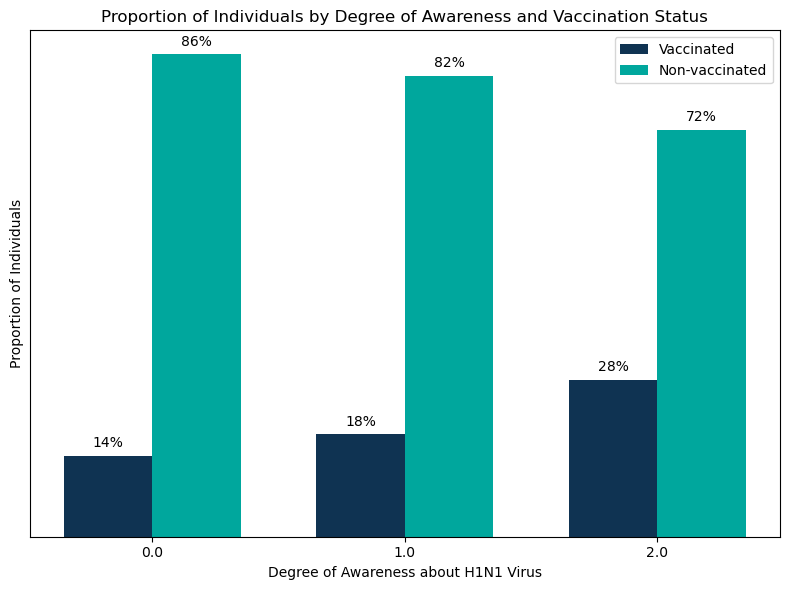

In [25]:
# Calculate the proportion of vaccinated individuals by degree of awareness
vaccinated_by_awareness = mergedData.groupby('h1n1_knowledge')['h1n1_vaccine'].mean()

# Calculate the proportion of non-vaccinated individuals by degree of awareness
non_vaccinated_by_awareness = 1 - vaccinated_by_awareness

# Plotting side by side bars
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(vaccinated_by_awareness.index))

# Plotting vaccinated individuals
plt.bar(index, vaccinated_by_awareness.values, bar_width, label='Vaccinated')

# Plotting non-vaccinated individuals beside vaccinated individuals
plt.bar(index + bar_width, non_vaccinated_by_awareness.values, bar_width, label='Non-vaccinated')

# Adding labels and title
plt.title('Proportion of Individuals by Degree of Awareness and Vaccination Status')
plt.xlabel('Degree of Awareness about H1N1 Virus')
plt.ylabel('Proportion of Individuals')
plt.xticks(index + bar_width / 2, vaccinated_by_awareness.index)  # Adjusting x ticks
plt.legend()

# Adding percentage values on top of the bars
for i, (vacc, non_vacc) in enumerate(zip(vaccinated_by_awareness.values, non_vaccinated_by_awareness.values)):
    plt.text(i, vacc + 0.01, '{:.0%}'.format(vacc), ha="center", va="bottom", color='black', fontsize=10)
    plt.text(i + bar_width, non_vacc + 0.01, '{:.0%}'.format(non_vacc), ha="center", va="bottom", color='black', fontsize=10)

# Remove y-axis
plt.gca().axes.yaxis.set_ticks([])

plt.tight_layout()

plt.savefig('images/awareness.png')
# Show plot
plt.show()

**No Knowledge/Low Knowledge:** Respondents with no knowledge (level 0) or limited knowledge (level 1) about the H1N1 flu exhibit relatively lower vaccination rates compared to those with higher levels of knowledge. Approximately 85.59% of respondents with no knowledge and 81.82% of those with limited knowledge opted not to receive the H1N1 vaccine.

**High Knowledge:** In contrast, respondents with a higher level of knowledge about the H1N1 flu (level 2) demonstrate a higher likelihood of vaccination, with approximately 27.81% of them choosing to receive the H1N1 vaccine.

These findings suggest a positive association between knowledge about the H1N1 flu and vaccination behavior. Individuals with greater knowledge about the H1N1 flu are more likely to opt for vaccination, highlighting the importance of education and awareness campaigns in promoting vaccination uptake and public health preparedness during flu outbreaks.

### **Vaccination Rates by HHS Geo Region**

**Geographic Regions:** Respondents are categorized based on their geographic regions, represented by abbreviated codes such as 'atmpeygn', 'bhuqouqj', 'dqpwygqj'.

**Vaccination Status:** The proportions of individuals who received (1) or did not receive (0) the H1N1 vaccine are depicted in the cross-tabulation.

In [26]:
# Create a cross-tabulation of vaccination status by contact with young children
geographic_cross_tab = pd.crosstab(index=mergedData['hhs_geo_region'], columns=mergedData['h1n1_vaccine'], normalize='index')

# Print the cross-tabulation
print(geographic_cross_tab)

h1n1_vaccine           0         1
hhs_geo_region                    
atmpeygn        0.782587  0.217413
bhuqouqj        0.741391  0.258609
dqpwygqj        0.828597  0.171403
fpwskwrf        0.798469  0.201531
kbazzjca        0.801610  0.198390
lrircsnp        0.789702  0.210298
lzgpxyit        0.819874  0.180126
mlyzmhmf        0.769505  0.230495
oxchjgsf        0.769150  0.230850
qufhixun        0.777563  0.222437


Regional Disparities: While there are variations in vaccination rates across regions, the differences are not substantial. Most regions have vaccination rates ranging from approximately 17% to 23%, indicating a relatively consistent pattern of vaccination behavior across geographic regions.

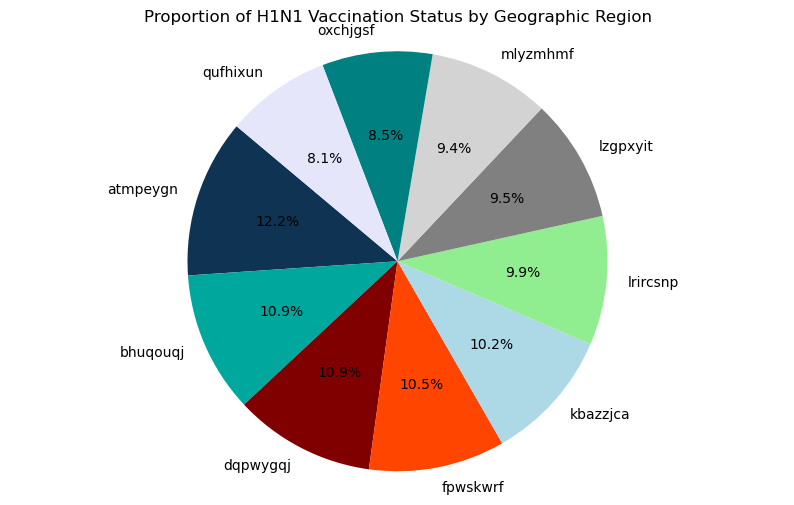

In [27]:
vaccination_by_region = mergedData.groupby('hhs_geo_region')['h1n1_vaccine'].mean().sort_values(ascending=False)
# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(vaccination_by_region, labels=geographic_cross_tab.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of H1N1 Vaccination Status by Geographic Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.savefig('images/region.png')
plt.show()

### **Encoding the categorical columns**

In [28]:
LE = LabelEncoder()
for col in str_cols:
    mergedData[col] = LE.fit_transform(mergedData[col]) # Converts to int64

In [29]:
mergedData[str_cols].head()

,age_group,race,sex,income_poverty,rent_or_own,hhs_geo_region
0,3,3,0,2,0,8
1,1,3,1,2,1,1
2,0,3,1,0,0,9
3,4,3,0,2,1,5
4,2,3,0,0,0,9


### **Feature Selection**
calculates the correlation matrix for a dataset , then determines the absolute correlation of each feature with the target variable h1n1_vaccine. It selects the top k features based on the strength of their correlation with the target variable.

In [30]:
# Calculate the correlation matrix
corr_matrix = mergedData.corr()

# Get the absolute correlation of features with the target variable
corr_with_target = abs(corr_matrix['h1n1_vaccine']).sort_values(ascending=False)

# Select the top k features based on correlation strength
k = 20  # Adjust as needed
selected_features = corr_with_target[1:k+1].index.tolist()

# Print the selected features
print("Selected Features:")
for feature in selected_features:
    print("-", feature)

Selected Features:
- doctor_recc_h1n1
- opinion_h1n1_risk
- opinion_h1n1_vacc_effective
- opinion_seas_risk
- doctor_recc_seasonal
- opinion_seas_vacc_effective
- health_worker
- h1n1_concern
- h1n1_knowledge
- chronic_med_condition
- behavioral_wash_hands
- behavioral_touch_face
- age_group
- race
- behavioral_antiviral_meds
- rent_or_own
- income_poverty
- sex
- household_adults
- hhs_geo_region


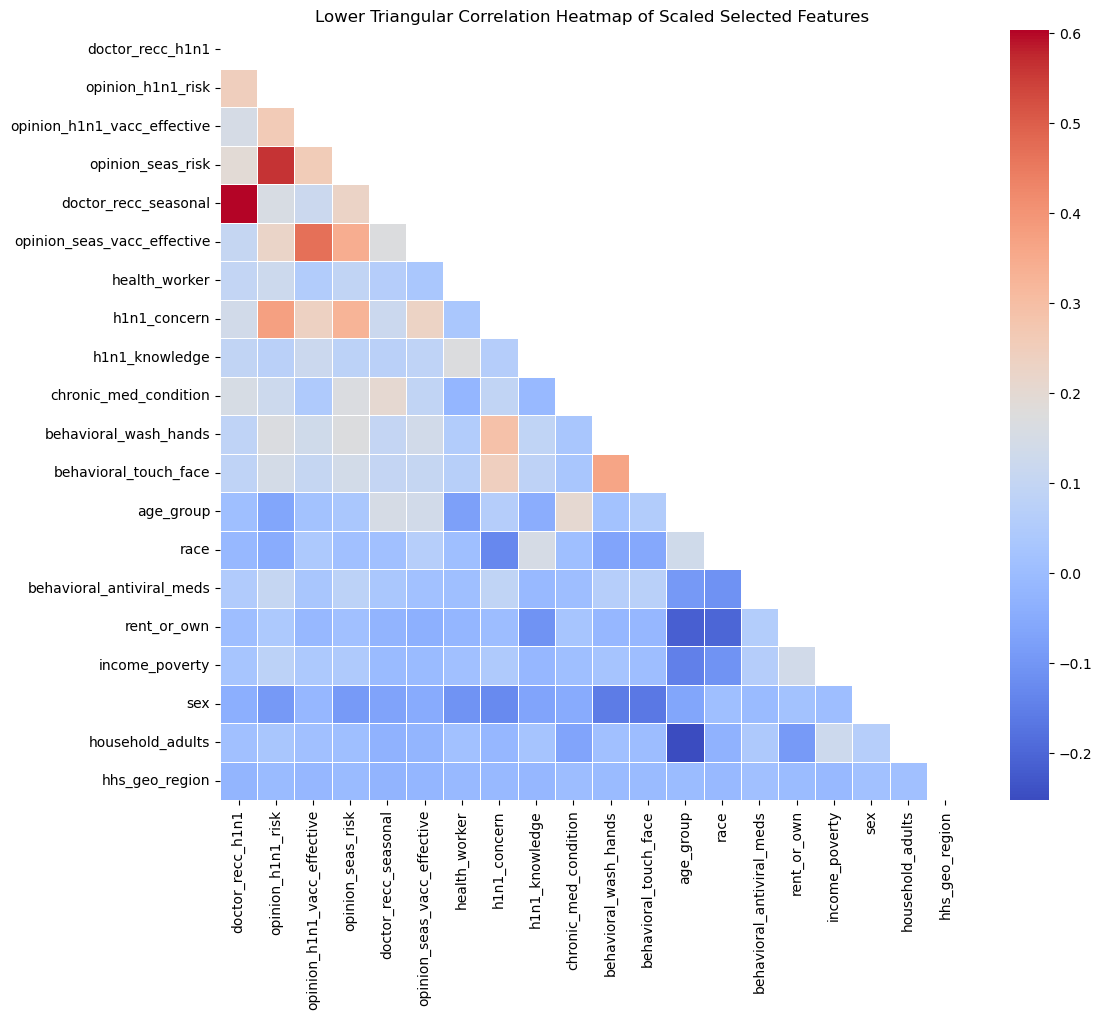

In [31]:
# Extract the selected features from the dataset
selected_features_df = mergedData[selected_features]

# Scale the selected features
scaler = StandardScaler()
scaled_selected_features = scaler.fit_transform(selected_features_df)

# Convert scaled features back to DataFrame
scaled_selected_features_df = pd.DataFrame(scaled_selected_features, columns=selected_features)

# Calculate the correlation matrix for scaled selected features
selected_corr_matrix = scaled_selected_features_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(selected_corr_matrix, dtype=bool))

# Plot the correlation heatmap for selected features
plt.figure(figsize=(12, 10))
sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Lower Triangular Correlation Heatmap of Scaled Selected Features')
plt.savefig('images/corrmatrix.png')
plt.show()

### **Modelling**

In the modelling process, the primary focus is on developing a model that accurately predicts whether an individual is vaccinated against H1N1 or not. To achieve this goal, priority is given to minimizing false positives over false negatives due to the potential consequences associated with misclassifying individuals as vaccinated when they are not.

**Evaluation Metrics:**

**Accuracy:** This metric measures the overall correctness of the model's predictions.

**Precision:** Precision represents the proportion of true positive predictions among all positive predictions made by the model. In this context, precision is crucial because false positives, indicating individuals are vaccinated when they are not, are more problematic than false negatives.

**Recall:** Recall, also known as sensitivity, measures the proportion of actual positives that were correctly identified by the model. While recall is important, it is secondary to precision in the evaluation.

**F1-Score:** The F1-score is the harmonic mean of precision and recall. It provides a balanced assessment of the model's performance, considering both false positives and false negatives.

By prioritizing precision, the aim is to minimize the occurrence of false positives, ensuring that the model's predictions are trustworthy and reliable for decision-making in the business context.


####  Data Splitting and Test data processing <a id="split"></a> 
#### Choosing 80%, 20% for train and validation

In [32]:
# Copy the scaled selected features DataFrame to a new DataFrame
features_with_label = scaled_selected_features_df.copy()

# Add the 'h1n1_vaccine' column from the mergedData DataFrame to the features DataFrame
features_with_label['h1n1_vaccine'] = mergedData['h1n1_vaccine']

# Now features_with_label contains the selected features along with the 'h1n1_vaccine' column

# Separate features and labels
features = features_with_label.drop(columns=['h1n1_vaccine'])  # Drop the target variable
label = features_with_label['h1n1_vaccine']  # Extract the target variable

In [33]:
# Split the data into training and testing sets
train, test = train_test_split(features_with_label, test_size=0.2, shuffle=True)

# Separate features and labels for training set
train_x, train_y = train.drop(columns=['h1n1_vaccine']), train['h1n1_vaccine']

# Separate features and labels for testing set
test_x, test_y = test.drop(columns=['h1n1_vaccine']), test['h1n1_vaccine']


In [34]:
features_with_label.shape

(26707, 21)

Ensuring the trainy is binary for smooth SMOTE for the imbalance target

In [35]:
train_y.unique()

array([0, 1], dtype=int64)

In [36]:
# Handling class imbalance with SMOTE (Synthetic Minority Over-sampling Technique)
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(train_x, train_y)

In [37]:
# Calculate class distribution of the resampled target variable
class_distribution = pd.Series(y_resampled).value_counts()

# Print the class distribution
print("Class Distribution after SMOTE:")
print(class_distribution)


Class Distribution after SMOTE:
h1n1_vaccine
0    16797
1    16797
Name: count, dtype: int64


In [38]:
X_resampled.head()

,doctor_recc_h1n1,opinion_h1n1_risk,opinion_h1n1_vacc_effective,opinion_seas_risk,doctor_recc_seasonal,opinion_seas_vacc_effective,health_worker,h1n1_concern,h1n1_knowledge,chronic_med_condition,behavioral_wash_hands,behavioral_touch_face,age_group,race,behavioral_antiviral_meds,rent_or_own,income_poverty,sex,household_adults,hhs_geo_region
0,-0.503893,-0.264403,1.146988,0.941455,-0.659437,0.904702,-0.34895,0.418262,-0.423626,-0.612735,-2.177944,-1.453764,-0.127724,0.465442,-0.226293,-0.534182,0.809413,-0.827124,0.149930,-0.295711
1,-0.503893,-0.264403,-0.852660,-0.512890,1.516445,-0.023708,-0.34895,1.518373,-0.423626,-0.612735,0.459149,0.687870,1.244684,0.465442,-0.226293,-0.534182,2.299931,-0.827124,0.149930,0.417065
2,-0.503893,-1.047610,0.147164,0.941455,-0.659437,-0.023708,-0.34895,0.418262,-0.423626,-0.612735,0.459149,0.687870,1.244684,0.465442,-0.226293,-0.534182,-0.681106,1.209008,-1.183463,0.417065
3,-0.503893,-1.047610,0.147164,0.941455,-0.659437,-0.023708,-0.34895,-0.681849,-0.423626,-0.612735,-2.177944,-1.453764,-0.127724,0.465442,-0.226293,-0.534182,0.809413,1.209008,-1.183463,-0.652099
4,-0.503893,1.302012,0.147164,-0.512890,-0.659437,-1.880528,-0.34895,0.418262,-2.044279,1.632027,0.459149,0.687870,1.244684,0.465442,-0.226293,-0.534182,-0.681106,-0.827124,-1.183463,-1.721263


In [39]:
y_resampled.head()

0    0
1    0
2    0
3    0
4    0
Name: h1n1_vaccine, dtype: int64

Function for all the preprocessing steps done to the training dataset so it can be done to the testing dataset 

In [40]:
def preprocess_test_data(testData):
    # Drop unnecessary columns
    testData.drop(['health_insurance','employment_industry','employment_occupation', 'respondent_id', 'child_under_6_months','opinion_h1n1_sick_from_vacc','opinion_seas_sick_from_vacc','behavioral_large_gatherings', 'behavioral_outside_home','marital_status',
           'behavioral_avoidance','behavioral_face_mask','employment_status','education','census_msa'], axis=1, inplace=True)
    
    # Impute missing values for numerical features with median
    numerical_cols = testData.select_dtypes(include='number').columns
    for col in numerical_cols:
        testData[col].fillna(testData[col].median(), inplace=True)
        
    # Impute missing values for categorical features with mode
    categorical_cols = testData.select_dtypes(include='object').columns
    for col in categorical_cols:
        testData[col].fillna(testData[col].mode()[0], inplace=True)
        
    # Encode categorical variables
    LE = LabelEncoder()
    for col in categorical_cols:
        testData[col] = LE.fit_transform(testData[col])

    
    return testData



Reading the testing dataset

In [41]:
testData = pd.read_csv('Data/test_set_features.csv')
testData.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [42]:
testData.shape

(26708, 36)

In [43]:
testData = preprocess_test_data(testData)

In [44]:
# Calculate the correlation matrix for the training dataset
corr_matrix = mergedData.corr()

# Get the absolute correlation of features with the target variable
corr_with_target = abs(corr_matrix['h1n1_vaccine']).sort_values(ascending=False)

# Select the top k features based on correlation strength
k = 20  # Adjust as needed
selected_features = corr_with_target[1:k+1].index.tolist()

# Print the selected features
print("Selected Features:")
for feature in selected_features:
    print("-", feature)

# Now apply the selected features to the test dataset
test_selected_features = testData[selected_features]

# Scale the selected features
scaler = StandardScaler()
scaled_tested_features = scaler.fit_transform(test_selected_features)

# Convert scaled features back to DataFrame
scaled_tested_features_df = pd.DataFrame(scaled_tested_features, columns=selected_features)

Selected Features:
- doctor_recc_h1n1
- opinion_h1n1_risk
- opinion_h1n1_vacc_effective
- opinion_seas_risk
- doctor_recc_seasonal
- opinion_seas_vacc_effective
- health_worker
- h1n1_concern
- h1n1_knowledge
- chronic_med_condition
- behavioral_wash_hands
- behavioral_touch_face
- age_group
- race
- behavioral_antiviral_meds
- rent_or_own
- income_poverty
- sex
- household_adults
- hhs_geo_region


similarity check 

In [45]:
X_resampled.columns

Index(['doctor_recc_h1n1', 'opinion_h1n1_risk', 'opinion_h1n1_vacc_effective',
       'opinion_seas_risk', 'doctor_recc_seasonal',
       'opinion_seas_vacc_effective', 'health_worker', 'h1n1_concern',
       'h1n1_knowledge', 'chronic_med_condition', 'behavioral_wash_hands',
       'behavioral_touch_face', 'age_group', 'race',
       'behavioral_antiviral_meds', 'rent_or_own', 'income_poverty', 'sex',
       'household_adults', 'hhs_geo_region'],
      dtype='object')

In [46]:
scaled_tested_features_df.isnull().sum()

doctor_recc_h1n1               0
opinion_h1n1_risk              0
opinion_h1n1_vacc_effective    0
opinion_seas_risk              0
doctor_recc_seasonal           0
opinion_seas_vacc_effective    0
health_worker                  0
h1n1_concern                   0
h1n1_knowledge                 0
chronic_med_condition          0
behavioral_wash_hands          0
behavioral_touch_face          0
age_group                      0
race                           0
behavioral_antiviral_meds      0
rent_or_own                    0
income_poverty                 0
sex                            0
household_adults               0
hhs_geo_region                 0
dtype: int64

In [47]:
scaled_tested_features_df.shape

(26708, 20)

### **Baseline Models**

#### Decision Tree

In [48]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
dt_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test data using the trained classifier
y_pred_dt = dt_classifier.predict(test_x)

# Evaluate the performance of the classifier
print("Classification Report:")
print(classification_report(test_y, y_pred_dt))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      4236
           1       0.41      0.47      0.43      1106

    accuracy                           0.75      5342
   macro avg       0.63      0.64      0.64      5342
weighted avg       0.76      0.75      0.75      5342



Decision tree model demonstrates relatively high accuracy and recall for class 0, suggesting it effectively captures individuals who are not vaccinated, its precision for class 1 is low. This means there's a considerable number of false positive predictions for vaccinated individuals, which can have consequences in real-world scenarios, given the priority on minimizing false positives.

## **Random Forest**

In [49]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test data using the trained classifier
y_pred_rf = rf_classifier.predict(test_x)

# Evaluate the performance of the classifier
print("Classification Report for Random Forest:")
print(classification_report(test_y, y_pred_rf))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4236
           1       0.64      0.45      0.53      1106

    accuracy                           0.83      5342
   macro avg       0.75      0.69      0.71      5342
weighted avg       0.82      0.83      0.82      5342



Random Forest model demonstrates relatively high accuracy and recall for class 0, indicating it effectively captures individuals who are not vaccinated. However, its precision for class 1 is lower, suggesting a significant number of false positive predictions for vaccinated individuals. This imbalance between precision and recall highlights the importance of further tuning the model or exploring other techniques to improve its performance.

## **K- Nearest Neighbor**

In [50]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test data using the trained classifier
y_pred_knn = knn_classifier.predict(test_x)

# Evaluate the performance of the classifier
print("Classification Report for KNN:")
print(classification_report(test_y, y_pred_knn))

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      4236
           1       0.38      0.69      0.49      1106

    accuracy                           0.70      5342
   macro avg       0.64      0.70      0.64      5342
weighted avg       0.79      0.70      0.73      5342



 KNN model demonstrates moderate accuracy and recall for class 1, indicating it captures a significant portion of vaccinated individuals. However, its precision for class 1 is relatively low, suggesting a substantial number of false positive predictions. Additionally, the model shows lower recall for class 0, indicating it may miss some individuals who are not vaccinated. This highlights the need for further refinement or alternative approaches to improve the model's performance.

## **Naive bayes**

In [51]:
# Initialize the Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Fit the classifier to the training data
naive_bayes_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test data using the trained classifier
y_pred_nb = naive_bayes_classifier.predict(test_x)

# Generate the classification report
print("Classification Report for Naive Bayes:")
print(classification_report(test_y, y_pred_nb))

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      4236
           1       0.41      0.73      0.53      1106

    accuracy                           0.73      5342
   macro avg       0.66      0.73      0.67      5342
weighted avg       0.81      0.73      0.75      5342



Naive Bayes model demonstrates moderate accuracy and recall for class 1, indicating it captures a significant portion of vaccinated individuals. However, its precision for class 1 is relatively low, suggesting a substantial number of false positive predictions. Additionally, the model shows decent precision and recall for class 0, indicating it performs reasonably well in identifying individuals who are not vaccinated.

## **Support Vector Machine**

In [52]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Fit the classifier to the training data
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test data using the trained classifier
y_pred_svm = svm_classifier.predict(test_x)

# Evaluate the performance of the classifier
print("Classification Report for SVM:")
print(classification_report(test_y, y_pred_svm))

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      4236
           1       0.51      0.71      0.59      1106

    accuracy                           0.80      5342
   macro avg       0.71      0.77      0.73      5342
weighted avg       0.83      0.80      0.81      5342



SVM model demonstrates moderate accuracy and recall for class 1, indicating it captures a significant portion of vaccinated individuals. However, its precision for class 1 is relatively low, suggesting a substantial number of false positive predictions. Additionally, the model shows good precision and recall for class 0, indicating it performs reasonably well in identifying individuals who are not vaccinated. 

## **Logistic Regression**

In [53]:
# Initialize the logistic regression classifier
logistic_regression = LogisticRegression(random_state=42)

# Fit the classifier to the training data
logistic_regression.fit(X_resampled, y_resampled)

# Make predictions on the test data using the trained classifier
y_pred_logistic = logistic_regression.predict(test_x)

# Evaluate the performance of the classifier
print("Classification Report for Logistic Regression:")
print(classification_report(test_y, y_pred_logistic))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      4236
           1       0.48      0.74      0.59      1106

    accuracy                           0.78      5342
   macro avg       0.70      0.77      0.72      5342
weighted avg       0.83      0.78      0.80      5342




Logistic Regression model demonstrates moderate accuracy and recall for class 1, indicating it captures a significant portion of vaccinated individuals. However, its precision for class 1 is relatively low, suggesting a substantial number of false positive predictions. Additionally, the model shows good precision and recall for class 0, indicating it performs reasonably well in identifying individuals who are not vaccinated.

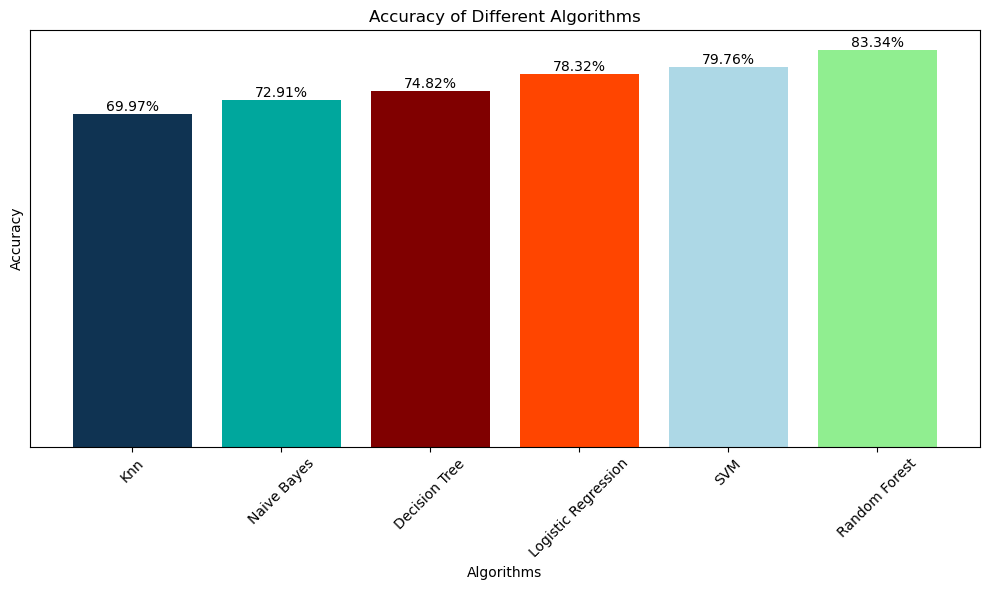

In [54]:
# Initialize classifiers
classifiers = {
    'Decision Tree': dt_classifier,
    'Random Forest': rf_classifier,
    'Knn': knn_classifier,
    'Naive Bayes': naive_bayes_classifier,
    'SVM': svm_classifier,
    'Logistic Regression': logistic_regression
}

# Store the classification reports
classification_reports = {}
for classifier_name, classifier in classifiers.items():
    y_pred = classifier.predict(test_x)
    report = classification_report(test_y, y_pred, output_dict=True)
    accuracy = report['accuracy'] * 100  # Convert accuracy to percentage
    classification_reports[classifier_name] = accuracy

# Sort classifiers by accuracy in ascending order
sorted_classifiers = sorted(classification_reports.items(), key=lambda x: x[1])

# Plotting the bar graph for accuracy
plt.figure(figsize=(10, 6))
bars = plt.bar([x[0] for x in sorted_classifiers], [x[1] for x in sorted_classifiers], color=hospital_colors)

# Add percentage values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.xticks(rotation=45)
plt.yticks([])  # Remove y-axis values
plt.tight_layout()
plt.savefig('images/basealgorithm_accuracy.png')
plt.show()

Random Forest outperforms the other algorithms, followed by SVM and Logistic Regression. Naive Bayes and KNN have slightly lower accuracies, while Decision Tree has the lowest accuracy among the listed algorithms.

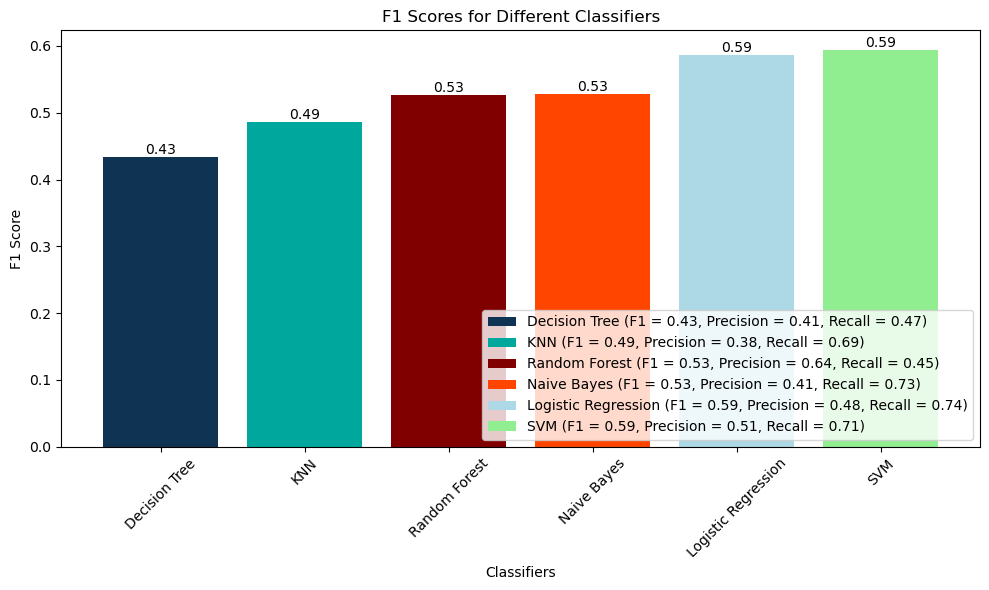

In [67]:
# Store the F1 scores, precision, and recall for each classifier
classifier_metrics = {
    'Decision Tree': classification_report(test_y, y_pred_dt, output_dict=True)['1'],
    'Random Forest': classification_report(test_y, y_pred_rf, output_dict=True)['1'],
    'KNN': classification_report(test_y, y_pred_knn, output_dict=True)['1'],
    'Naive Bayes': classification_report(test_y, y_pred_nb, output_dict=True)['1'],
    'SVM': classification_report(test_y, y_pred_svm, output_dict=True)['1'],
    'Logistic Regression': classification_report(test_y, y_pred_logistic, output_dict=True)['1']
}

# Sort the classifiers based on F1 scores in ascending order
sorted_metrics = sorted(classifier_metrics.items(), key=lambda x: x[1]['f1-score'])

# Plotting the classification reports
plt.figure(figsize=(10, 6))
for classifier, metrics in sorted_metrics:
    f1 = metrics['f1-score']
    precision = metrics['precision']
    recall = metrics['recall']
    plt.bar(classifier, f1, label=f'{classifier} (F1 = {f1:.2f}, Precision = {precision:.2f}, Recall = {recall:.2f})')
    
    # Add F1 score as text on top of each bar
    plt.text(classifier, f1, f'{f1:.2f}', ha='center', va='bottom')

plt.xlabel('Classifiers')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Different Classifiers')
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/basef1_scores.png')
plt.show()

Logistic Regression and SVM have the highest F1 scores among the listed classifiers. Therefore, they are deemed to have performed relatively better in terms of balancing precision and recall, indicating their effectiveness in correctly identifying positive instances while minimizing false positives.

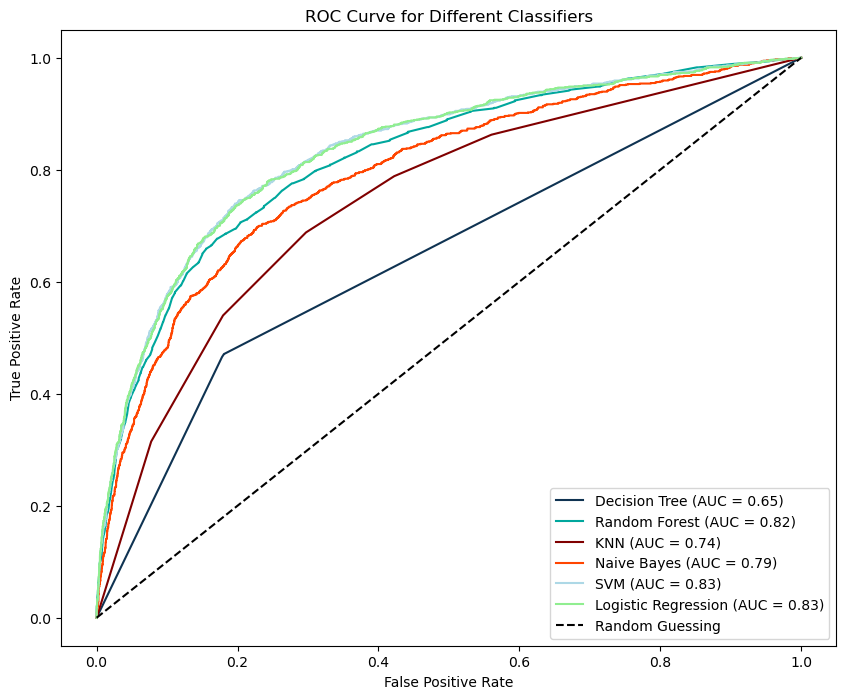

In [68]:
# Define classifiers and their predicted probabilities
classifiers = [dt_classifier, rf_classifier, knn_classifier, naive_bayes_classifier, svm_classifier, logistic_regression]
classifier_names = ['Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes', 'SVM', 'Logistic Regression']
predicted_probabilities = [dt_classifier.predict_proba(test_x)[:, 1], 
                           rf_classifier.predict_proba(test_x)[:, 1], 
                           knn_classifier.predict_proba(test_x)[:, 1], 
                           naive_bayes_classifier.predict_proba(test_x)[:, 1], 
                           svm_classifier.decision_function(test_x),
                           logistic_regression.predict_proba(test_x)[:, 1]]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for i in range(len(classifiers)):
    fpr, tpr, thresholds = roc_curve(test_y, predicted_probabilities[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (classifier_names[i], roc_auc))

# Plot ROC curve for random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Classifiers')
plt.legend(loc='lower right')
plt.savefig('images/baselineroc.png')
plt.show()

Decision Tree: AUC of 0.65 means it has a moderate ability to distinguish between individuals who received the H1N1 vaccine and those who didn't.

Random Forest: AUC of 0.82 suggests it has a good ability to differentiate between vaccinated and non-vaccinated individuals. It performs better than Decision Tree in this aspect.

KNN (K-Nearest Neighbors): AUC of 0.74 indicates a moderate ability to discriminate between the two classes. It's not as strong as Random Forest but still provides meaningful discrimination.

Naive Bayes: AUC of 0.79 implies relatively good performance in distinguishing between vaccinated and non-vaccinated individuals. It's similar to Random Forest in discrimination ability.

SVM (Support Vector Machine): AUC of 0.83 suggests strong discrimination ability. It performs better than most other classifiers, including Random Forest and Naive Bayes.

Logistic Regression: AUC of 0.83, similar to SVM, indicates strong discrimination ability. It's one of the best-performing classifiers in terms of distinguishing between the two classes.

SVM and Logistic Regression show the strongest ability to discriminate between the two classes, followed by Random Forest and Naive Bayes, while Decision Tree and KNN exhibit moderate discrimination ability.

## **CrossValidation**

Evaluates the performance of each classifier using k-fold cross-validation 

In [57]:
# Define classifiers
classifiers = {
    'Decision Tree': dt_classifier,
    'Random Forest': rf_classifier,
    'Knn': knn_classifier,
    'Naive Bayes': naive_bayes_classifier,
    'SVM': svm_classifier,
    'Logistic Regression': logistic_regression
}

# Define the number of folds for cross-validation
num_folds = 5

# Define the cross-validation method (k-fold cross-validation)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation for each classifier
for name, clf in classifiers.items():
    cv_scores = cross_val_score(clf, X_resampled, y_resampled, cv=kfold)
    print(f"{name}:")
    print("Cross-validation scores:", cv_scores)
    print("Mean CV score:", cv_scores.mean())
    print()

Decision Tree:
Cross-validation scores: [0.83420152 0.83286203 0.83449918 0.83077839 0.83536767]
Mean CV score: 0.8335417582279788

Random Forest:
Cross-validation scores: [0.8923947  0.89626433 0.89790147 0.89626433 0.89282525]
Mean CV score: 0.8951300141463197

Knn:
Cross-validation scores: [0.82556928 0.81143027 0.82720643 0.81604405 0.81676094]
Mean CV score: 0.8194021955928191

Naive Bayes:
Cross-validation scores: [0.72495907 0.72540557 0.72570323 0.73329364 0.73489134]
Mean CV score: 0.7288505697674268

SVM:
Cross-validation scores: [0.75487424 0.75026046 0.76023218 0.75889269 0.75394463]
Mean CV score: 0.7556408377623567

Logistic Regression:
Cross-validation scores: [0.75264176 0.75219527 0.76008335 0.75993451 0.75424233]
Mean CV score: 0.7558194446296779



Random Forest has the highest mean cross-validation score (approximately 0.895), indicating relatively better performance compared to other classifiers.

Decision Tree also shows good performance with a mean cross-validation score of approximately 0.834.

KNN, Naive Bayes, SVM, and Logistic Regression have slightly lower mean cross-validation scores, ranging from approximately 0.729 to 0.756.

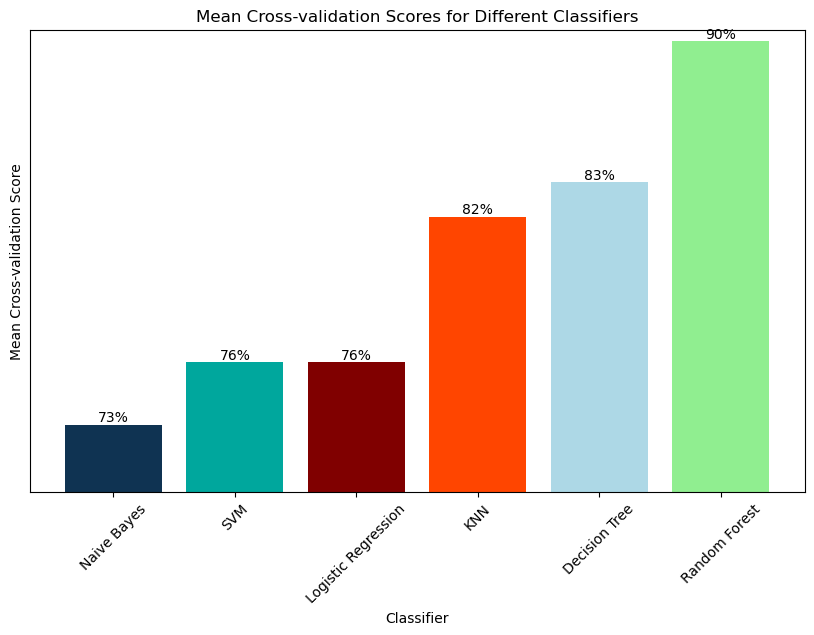

In [79]:
# Define classifiers and their mean cross-validation scores
classifiers = ['Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes', 'SVM', 'Logistic Regression']
mean_scores = [0.834, 0.895, 0.819, 0.729, 0.756, 0.756]  # Mean cross-validation scores from your results

# Sort classifiers and mean scores in ascending order of mean scores
classifiers, mean_scores = zip(*sorted(zip(classifiers, mean_scores), key=lambda x: x[1]))

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(classifiers, mean_scores, color=hospital_colors)

# Add percentage values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0%}', ha='center', va='bottom')

plt.xlabel('Classifier')
plt.ylabel('Mean Cross-validation Score')
plt.title('Mean Cross-validation Scores for Different Classifiers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.gca().axes.yaxis.set_ticks([])  # Remove y-axis ticks
plt.ylim(0.7, 0.9)  # Set y-axis limits for better visualization
plt.savefig('images/crossfdalgo.png')
plt.show()

#### Kfold cross validation f1 scores

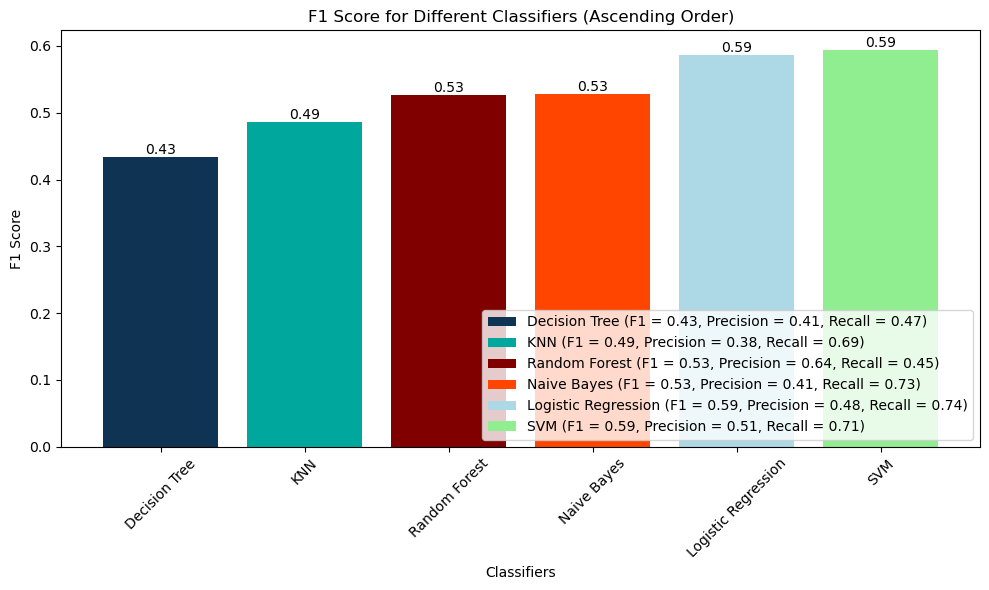

In [103]:
# Define the trained models
trained_classifiers = {
    'Decision Tree': dt_classifier,
    'Random Forest': rf_classifier,
    'KNN': knn_classifier,
    'Naive Bayes': naive_bayes_classifier,
    'SVM': svm_classifier,
    'Logistic Regression': logistic_regression
}

# Initialize a dictionary to store classification reports
classification_reports = {}

# Initialize empty lists to store classifier names and F1 scores
classifier_names = []

# Perform predictions and generate classification reports for each classifier
for name, clf in trained_classifiers.items():
    y_pred = clf.predict(test_x)
    report = classification_report(test_y, y_pred, output_dict=True)
    classification_reports[name] = report
    classifier_names.append(name)

# Sort the classifiers based on F1 scores in ascending order
sorted_classifiers = sorted(classifier_names, key=lambda x: classification_reports[x]['1']['f1-score'])

# Plotting the classification reports
plt.figure(figsize=(10, 6))
for name in sorted_classifiers:
    report = classification_reports[name]
    f1 = report['1']['f1-score']
    precision = report['1']['precision']
    recall = report['1']['recall']
    plt.bar(name, f1, label=f'{name} (F1 = {f1:.2f}, Precision = {precision:.2f}, Recall = {recall:.2f})')
    
    # Add F1 score as text on top of each bar
    plt.text(name, f1, f'{f1:.2f}', ha='center', va='bottom')

plt.xlabel('Classifiers')
plt.ylabel('F1 Score')
plt.title('F1 Score for Different Classifiers (Ascending Order)')
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/crossf1_sorted.png')
plt.show()


In the previous interpretation, Logistic Regression and SVM were highlighted for their higher precision, indicating a lower rate of false positives, which is prioritized.
In this result, Logistic Regression and SVM maintain their positions at the top of the F1 score list, reinforcing their superiority in terms of overall performance.

### **Baseline Models vs Cross Validation**
Decision Tree:

Mean cross-validation score: 83.35%
Baseline model accuracy: 69.97%
The Decision Tree model performs significantly better than the baseline model.
Random Forest:

Mean cross-validation score: 89.51%
Baseline model accuracy: 83.34%
The Random Forest model also outperforms the baseline model by a considerable margin.
KNN:

Mean cross-validation score: 81.94%
Baseline model accuracy: 74.82%
The KNN model demonstrates improved performance compared to the baseline model.
Naive Bayes:

Mean cross-validation score: 72.89%
Baseline model accuracy: 72.91%
The performance of Naive Bayes is close to that of the baseline model.
SVM:

Mean cross-validation score: 75.56%
Baseline model accuracy: 78.32%
The SVM model performs slightly worse than the baseline model.
Logistic Regression:

Mean cross-validation score: 75.58%
Baseline model accuracy: 79.76%
Similar to SVM, Logistic Regression also exhibits slightly lower performance compared to the baseline model.

Overall, Random Forest performs the best among the models, followed by Decision Tree and KNN, while Naive Bayes, SVM, and Logistic Regression perform relatively closer to the baseline model accuracy.

## **Hyperparameter tuning using grid search with cross-validation for multiple classification algorithms**
It iterates through each algorithm, searches for the best combination of hyperparameters specified in the parameters dictionary. The goal is to find the optimal hyperparameters for each algorithm to improve their performance in predicting the target variable.

In [60]:
# Define pipelines for different algorithms
pipelines = {
    'DecisionTree': Pipeline([('scaler', StandardScaler()), ('classifier', DecisionTreeClassifier())]),
    'RandomForest': Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier())]),
    'KNN': Pipeline([('scaler', StandardScaler()), ('classifier', KNeighborsClassifier())]),
    'NaiveBayes': Pipeline([('scaler', StandardScaler()), ('classifier', GaussianNB())]),
    'SVM': Pipeline([('scaler', StandardScaler()), ('classifier', SVC())]),
    'LogisticRegression': Pipeline([('scaler', StandardScaler()), ('classifier', LogisticRegression())])
}

# Define hyperparameters for each algorithm
parameters = {
    'DecisionTree': {
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'RandomForest': {
        'classifier__n_estimators': [10, 20, 30],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    },
    'NaiveBayes': {},
    'SVM': {
        'classifier__C': [0.1, 0.5, 1],
        'classifier__kernel': ['linear']
    },
    'LogisticRegression': {
        'classifier__C': [0.1, 0.5, 1],
        'classifier__penalty': ['l1', 'l2']
    }
}

# Perform grid search with cross-validation for each algorithm
for algo in pipelines:
    grid_search = GridSearchCV(pipelines[algo], parameters[algo], cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_resampled, y_resampled)
    
    print(f"Best parameters for {algo}:")
    print(grid_search.best_params_)
    print("Best score:", grid_search.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for DecisionTree:
{'classifier__max_depth': 20, 'classifier__min_samples_split': 10}
Best score: 0.8398543168783578
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for RandomForest:
{'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 30}
Best score: 0.885695831928944
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for KNN:
{'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}
Best score: 0.8524737937290514
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for NaiveBayes:
{}
Best score: 0.7281658554624258
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters for SVM:
{'classifier__C': 0.1, 'classifier__kernel': 'linear'}
Best score: 0.7556111334597391
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for LogisticRegression:
{'c

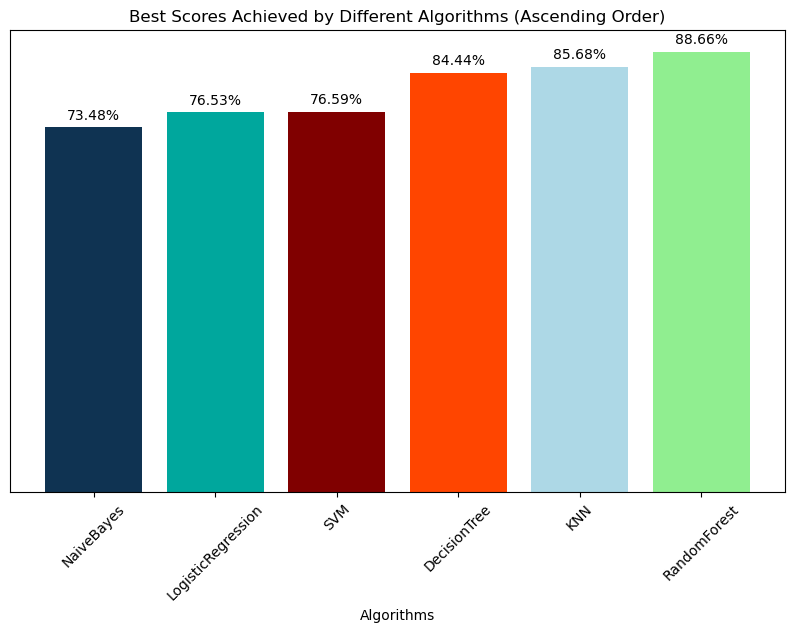

In [61]:
# Define algorithm names and best scores
algorithms = ['DecisionTree', 'RandomForest', 'KNN', 'NaiveBayes', 'SVM', 'LogisticRegression']
best_scores = [0.8443721580686496, 0.8866442601165296, 0.856791407682109, 0.7348076739621975, 0.765903907133392, 0.7652813203623875]

# Sort algorithms and best scores based on scores
sorted_indices = sorted(range(len(best_scores)), key=lambda k: best_scores[k])
sorted_algorithms = [algorithms[i] for i in sorted_indices]
sorted_scores = [best_scores[i] for i in sorted_indices]

# Plot the best scores for each algorithm
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_algorithms, sorted_scores, color=hospital_colors)

# Add scores on top of the bars
for bar, score in zip(bars, sorted_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{score:.2%}', ha='center', va='bottom')

# Remove y-axis
plt.gca().axes.get_yaxis().set_visible(False)

plt.xlabel('Algorithms')
plt.title('Best Scores Achieved by Different Algorithms (Ascending Order)')
plt.xticks(rotation=45)
plt.savefig('images/hyperparam_sorted.png')
plt.show()

Decision Tree:

Mean Cross-validation Score: 0.8335
Best Score: 0.8399
Difference: 0.8399 - 0.8335 = 0.0064
Random Forest:

Mean Cross-validation Score: 0.8951
Best Score: 0.8857
Difference: 0.8857 - 0.8951 = -0.0094
KNN:

Mean Cross-validation Score: 0.8194
Best Score: 0.8525
Difference: 0.8525 - 0.8194 = 0.0331
Naive Bayes:

Mean Cross-validation Score: 0.7289
Best Score: 0.7282
Difference: 0.7282 - 0.7289 = -0.0007
SVM:

Mean Cross-validation Score: 0.7556
Best Score: 0.7556
Difference: 0.7556 - 0.7556 = 0.0
Logistic Regression:

Mean Cross-validation Score: 0.7558
Best Score: 0.7557
Difference: 0.7557 - 0.7558 = -0.0001
Interpretation:

For Decision Tree and Random Forest, the best scores are slightly higher than the mean cross-validation scores, indicating decent generalization performance.

KNN shows a significant improvement in performance based on the best score compared to the mean cross-validation score, suggesting good generalization.

Naive Bayes, SVM, and Logistic Regression have very small differences between the best scores and mean cross-validation scores, indicating consistent performance between training and validation.

Overall, KNN exhibits the most significant improvement in generalization performance, while all models generally perform consistently between training and validation data.

Classification Report for DecisionTree:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      4236
           1       0.48      0.74      0.59      1106

    accuracy                           0.78      5342
   macro avg       0.70      0.77      0.72      5342
weighted avg       0.83      0.78      0.80      5342

Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      4236
           1       0.48      0.74      0.59      1106

    accuracy                           0.78      5342
   macro avg       0.70      0.77      0.72      5342
weighted avg       0.83      0.78      0.80      5342

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      4236
           1       0.48      0.74      0.59      1106

    accuracy                           0.78      5342
   macro avg     

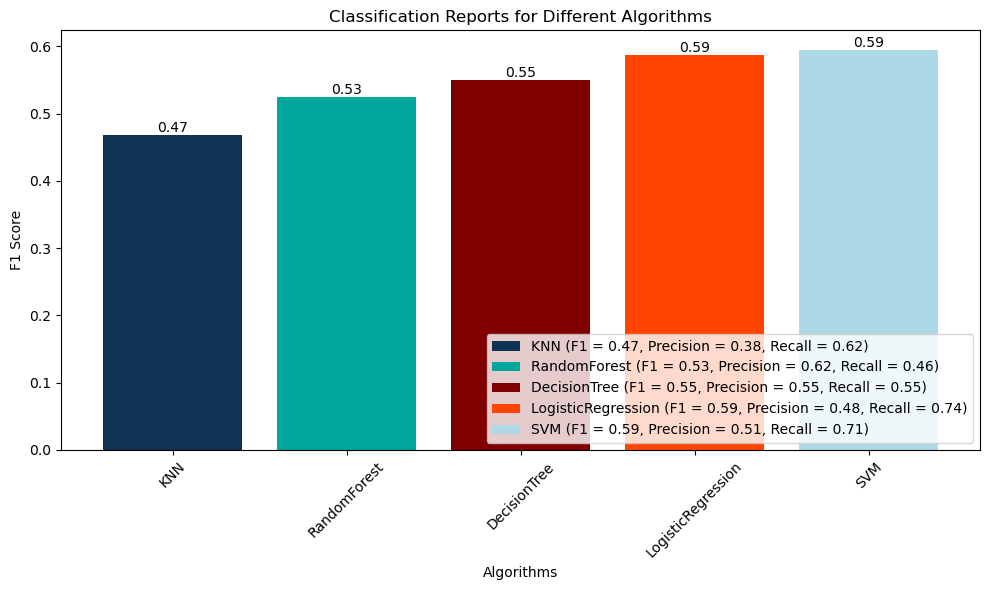

In [69]:

# Define pipelines with best parameters for each algorithm
pipelines = {
    'DecisionTree': Pipeline([('scaler', StandardScaler()), 
                              ('classifier', DecisionTreeClassifier(max_depth=10, min_samples_split=5))]),
    'RandomForest': Pipeline([('scaler', StandardScaler()), 
                              ('classifier', RandomForestClassifier(n_estimators=20, max_depth=30, min_samples_split=5))]),
    'KNN': Pipeline([('scaler', StandardScaler()), 
                     ('classifier', KNeighborsClassifier(n_neighbors=3, weights='distance'))]),
    'NaiveBayes': GaussianNB(),  # No hyperparameters to tune
    'SVM': Pipeline([('scaler', StandardScaler()), 
                     ('classifier', SVC(C=0.5, kernel='linear'))]),
    'LogisticRegression': Pipeline([('scaler', StandardScaler()), 
                                    ('classifier', LogisticRegression(C=0.5, penalty='l2'))])
}

# Train the final models
for algo, pipeline in pipelines.items():
    if algo != 'NaiveBayes':
        pipeline.fit(X_resampled, y_resampled)

# Initialize a dictionary to store classification reports
classification_reports = {}

# Generate classification reports for each algorithm
for algo, pipeline in pipelines.items():
    if algo != 'NaiveBayes':
        y_pred = pipeline.predict(test_x)
        report = classification_report(test_y, y_pred, output_dict=True)
        classification_reports[algo] = report

# Print the classification reports
for algo, report in classification_reports.items():
    print(f"Classification Report for {algo}:")
    print(classification_report(test_y, y_pred))

# Sort the classification reports based on F1 scores in ascending order
sorted_reports = sorted(classification_reports.items(), key=lambda x: x[1]['1']['f1-score'])

# Plotting the classification reports
plt.figure(figsize=(10, 6))
for algo, report in sorted_reports:
    f1 = report['1']['f1-score']
    precision = report['1']['precision']
    recall = report['1']['recall']
    plt.bar(algo, f1, label=f'{algo} (F1 = {f1:.2f}, Precision = {precision:.2f}, Recall = {recall:.2f})')
    
    # Add F1 score as text on top of each bar
    plt.text(algo, f1, f'{f1:.2f}', ha='center', va='bottom')

plt.xlabel('Algorithms')
plt.ylabel('F1 Score')
plt.title('Classification Reports for Different Algorithms')
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/hypertunedf1.png')
plt.show()

Logistic Regression, SVM, and Random Forest have the highest F1 scores among the listed algorithms. Therefore, they are considered to perform relatively better in terms of balancing precision and recall, suggesting their effectiveness in correctly identifying positive instances while minimizing false positives.

Decision Tree: In the current result, the Decision Tree algorithm has improved significantly in terms of F1 score, precision, and recall, achieving F1 = 0.55, Precision = 0.55, Recall = 0.55.

KNN: The KNN algorithm shows a slight decrease in F1 score and precision, but an increase in recall compared to the previous result.

Random Forest: There is no significant change in the F1 score for the Random Forest algorithm, maintaining its position in the current result.

Logistic Regression and SVM: Both Logistic Regression and SVM algorithms maintain their positions and performance levels in the current result, with no significant changes observed.

Overall, while there are some fluctuations in the performance metrics of certain algorithms, Logistic Regression and SVM remain the top-performing algorithms in terms of F1 score, precision, and recall across both sets of results.

Based on the results of the hyperparameter tuning process, both Logistic Regression and SVM consistently demonstrate the highest F1 scores among the listed algorithms. This indicates that they excel in achieving a balance between precision and recall, which is crucial for accurately identifying positive instances while minimizing false positives.

Given the high performance of Logistic Regression and SVM, the choice between the two algorithms should be guided by the specific requirements and constraints of the project. If interpretability and simplicity are paramount considerations, Logistic Regression may be the preferable option. On the other hand, if sacrificing some interpretability in favor of potentially higher accuracy is acceptable, SVM could be the more suitable choice.

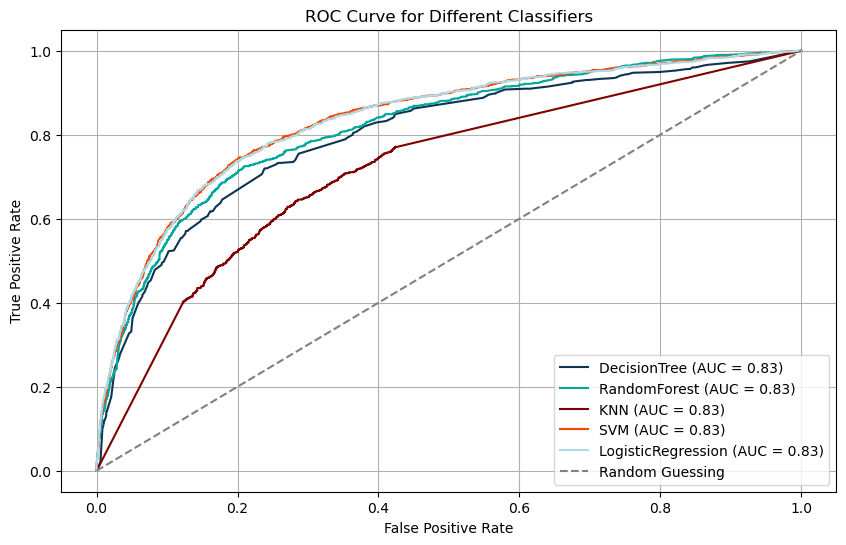

In [70]:
# Update the SVC pipeline to enable probability estimation
pipelines['SVM'] = Pipeline([('scaler', StandardScaler()), 
                             ('classifier', SVC(C=0.5, kernel='linear', probability=True))])

# Initialize an empty dictionary to store the ROC curve data
roc_data = {}

# Generate ROC curve data for each model
for algo, pipeline in pipelines.items():
    if algo != 'NaiveBayes':
        # Fit the pipeline on the training data before predicting
        pipeline.fit(X_resampled, y_resampled)
        
        # Ensure the scaler is fitted
        scaler = pipeline.named_steps['scaler']
        scaler.fit(X_resampled)
        
        # Predict probabilities and compute ROC curve
        y_pred_proba = pipeline.predict_proba(test_x)[:, 1]
        fpr, tpr, _ = roc_curve(test_y, y_pred_proba)
        roc_data[algo] = {'fpr': fpr, 'tpr': tpr}

# Plot ROC curves for each model
plt.figure(figsize=(10, 6))
for algo, data in roc_data.items():
    plt.plot(data['fpr'], data['tpr'], label=f'{algo} (AUC = {roc_auc_score(test_y, pipeline.predict_proba(test_x)[:, 1]):.2f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Classifiers')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.savefig('images/hyperroc.png')
plt.show()

Decision Tree, Random Forest, KNN, SVM, and Logistic Regression, have an AUC of 0.83, indicating consistent performance across these models. Moreover, at random guessing, where the AUC is around 0.5, indicating no discrimination ability by the model.

In [73]:
# Define XGBoost parameters
params = {
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'objective': 'binary:logistic'
}

# Convert your training data into DMatrix format
dtrain = xgb.DMatrix(X_resampled, label=y_resampled)

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Make predictions on the test data
dtest = xgb.DMatrix(test_x)
y_pred = model.predict(dtest)

# Evaluate the performance of the XGBoost model
print("Classification Report for XGBoost:")
print(classification_report(test_y, (y_pred > 0.5).astype(int)))


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      4236
           1       0.53      0.63      0.58      1106

    accuracy                           0.81      5342
   macro avg       0.72      0.74      0.73      5342
weighted avg       0.82      0.81      0.81      5342



The model demonstrates better performance in predicting class 0 (non-vaccinated individuals) compared to class 1 (vaccinated individuals), as indicated by higher precision, recall, and F1-score values for class 0.

## **Feature Importance**

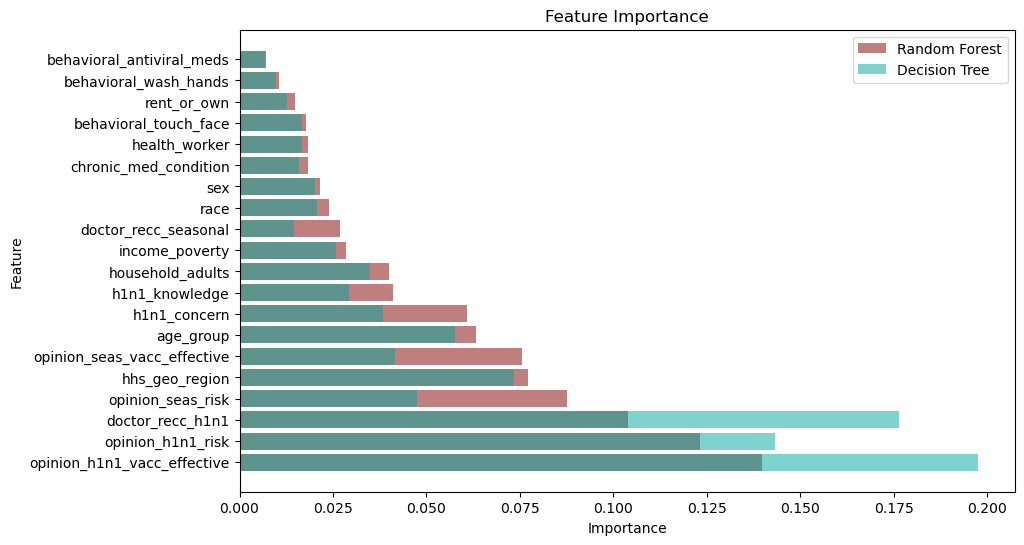

In [74]:
# Extract the selected features from the dataset
selected_features_df = mergedData[selected_features]

# Assuming you have trained decision tree and random forest models stored in variables 'dt_classifier' and 'rf_classifier' respectively
rf_feature_importance = rf_classifier.feature_importances_
dt_feature_importance = dt_classifier.feature_importances_

# Assuming 'selected_features' is a list of selected feature names
# Create DataFrames with reshaped 'selected_features'
rf_feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': rf_feature_importance })
dt_feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': dt_feature_importance})
# Sort by importance
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)
dt_feature_importance_df = dt_feature_importance_df.sort_values(by='Importance', ascending=False)


# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importance_df['Feature'], rf_feature_importance_df['Importance'], color='#800000', alpha=0.5, label='Random Forest')
plt.barh(dt_feature_importance_df['Feature'], dt_feature_importance_df['Importance'], color='#00a79d', alpha=0.5, label='Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.legend()
plt.savefig('images/featureImportance.png')
plt.show()

Random Forest: For this classifier, the feature importance values range from 0.000 to 0.200. Among the listed features, "opinion_h1n1_vacc_effective" has the highest importance, followed by "opinion_h1n1_risk" and "doctor_recc_h1n1." The least important features include "behavioral_antiviral_meds" and "behavioral_wash_hands."

Decision Tree: The importance values for the Decision Tree classifier start at 0.025 and go up to 0.200. Similarly, "opinion_h1n1_vacc_effective" is the most important feature, while "behavioral_antiviral_meds" and "behavioral_wash_hands" are among the least important ones.

Overall, both classifiers seem to prioritize "opinion_h1n1_vacc_effective" as the most influential feature, suggesting its strong predictive power in determining vaccination behavior.

## **Permutation Importance:**

 Permutation importance measures the impact of shuffling the values of each feature on the model's performance. Higher values indicate that shuffling a feature's values leads to a greater decrease in model performance, suggesting higher importance.

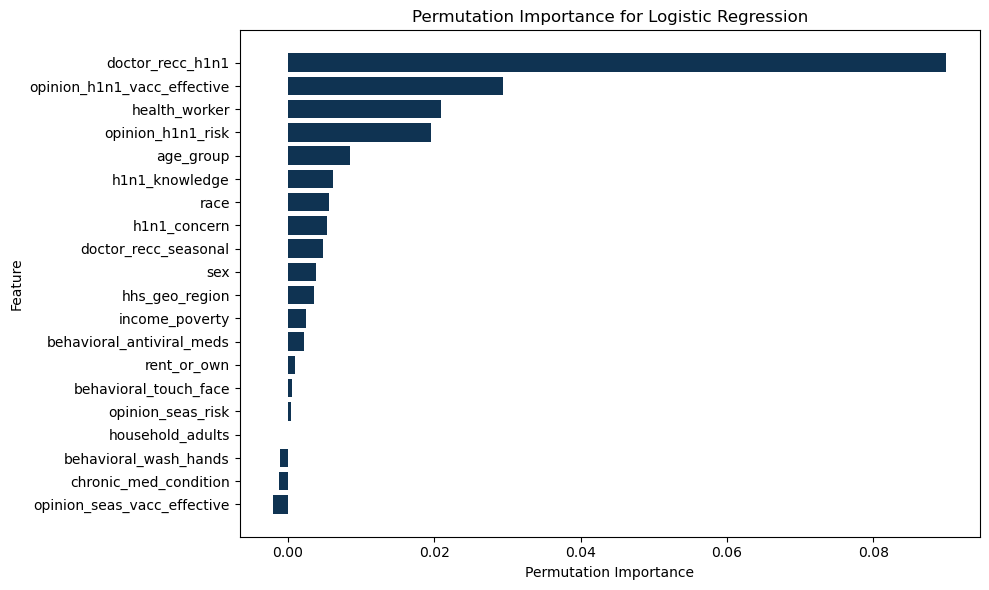

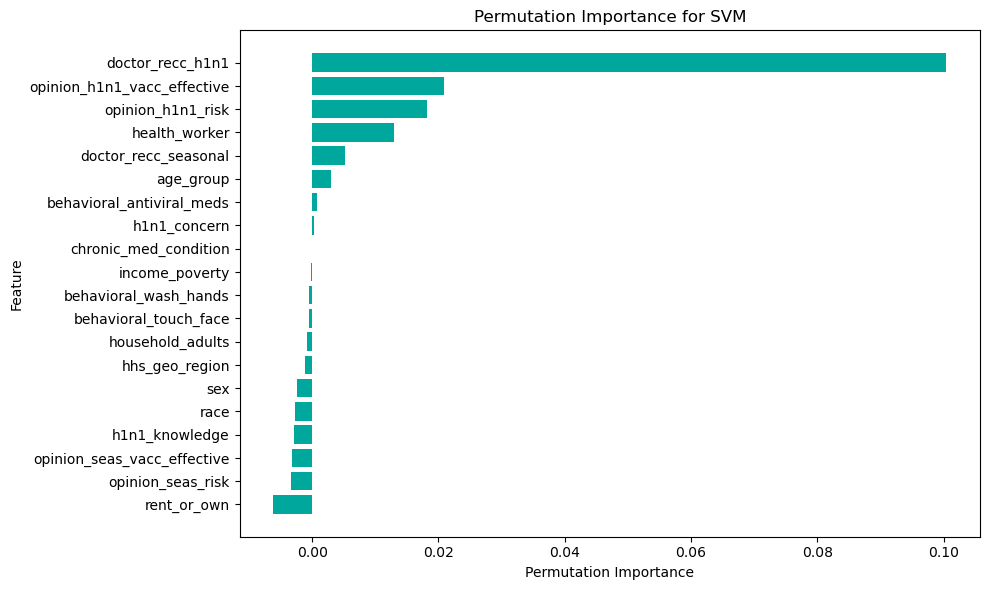

In [75]:
# Define the size of the subset (e.g., 10% of the test data)
subset_size = int(0.1 * len(test_x))

# Randomly select a subset of the test data
subset_indices = np.random.choice(len(test_x), size=subset_size, replace=False)
subset_test_x = test_x.iloc[subset_indices]
subset_test_y = test_y.iloc[subset_indices]

# Compute permutation importance for logistic regression
logistic_perm_importance = permutation_importance(logistic_regression, subset_test_x, subset_test_y, n_repeats=30, random_state=42)

# Compute permutation importance for SVM
svm_perm_importance = permutation_importance(svm_classifier, subset_test_x, subset_test_y, n_repeats=30, random_state=42)

# Sort features based on their mean importance scores
logistic_sorted_idx = logistic_perm_importance.importances_mean.argsort()
svm_sorted_idx = svm_perm_importance.importances_mean.argsort()

# Plot feature importance for logistic regression
plt.figure(figsize=(10, 6))
plt.barh(subset_test_x.columns[logistic_sorted_idx], logistic_perm_importance.importances_mean[logistic_sorted_idx], color='#0f3352')
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Importance for Logistic Regression')
plt.tight_layout()
plt.savefig('images/logistic_permutation_importance.png')
plt.show()

# Plot feature importance for SVM
plt.figure(figsize=(10, 6))
plt.barh(subset_test_x.columns[svm_sorted_idx], svm_perm_importance.importances_mean[svm_sorted_idx], color='#00a79d')
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Importance for SVM')
plt.tight_layout()
plt.savefig('images/svm_permutation_importance.png')
plt.show()

logistic Regression: The permutation importance values range from 0.00 to 0.08. Among the listed features, "doctor_recc_h1n1" has the highest importance, followed by "opinion_h1n1_risk" and "opinion_h1n1_vacc_effective." On the other hand, "doctor_recc_h1n1" and "opinion_h1n1_risk" appear to have lower importance.

Overall, this indicates the relative importance of each feature according to the Logistic Regression model, with "doctor_recc_h1n1" being the most influential feature in predicting vaccination behavior.

Support Vector Machine: The permutation importance values range from 0.00 to 0.08. Among the listed features, "doctor_recc_h1n1" has the highest importance, followed by "opinion_h1n1_risk" and "opinion_h1n1_vacc_effective." On the other hand, "doctor_recc_h1n1" and "opinion_h1n1_risk" appear to have lower importance.

Overall, this indicates the relative importance of each feature according to the Support Vector Machine model, with "doctor_recc_h1n1" being the most influential feature in predicting vaccination behavior.

## **CONCLUSION AND RECOMMENDATION**

**Findings**
--

- **Age Group Influence:** Older age groups exhibit higher vaccination rates, possibly due to increased susceptibility or greater awareness. For instance, individuals aged 55 and above show higher rates of vaccination compared to younger age groups like 18-34 years.

- **Household Composition:** While vaccination rates decrease slightly with an increase in the number of children in the household, the differences are relatively small. For instance, households with no children tend to have slightly higher vaccination rates compared to those with three or more children.

- **Gender Differences:** Both genders have similar vaccination rates, with slightly more females vaccinated compared to males. However, the differences in vaccination rates between genders are not substantial.

- **Perception of Effectiveness:** Respondents' perceived effectiveness of the vaccine significantly influences their likelihood of vaccination. Higher perceived effectiveness correlates with increased vaccination uptake, indicating the importance of addressing misconceptions and promoting awareness about vaccine efficacy.

- **Doctor Recommendation:** Recommendations from healthcare professionals play a crucial role in vaccination decisions. Respondents who received a recommendation from a doctor for the H1N1 vaccine exhibited a higher likelihood of vaccination compared to those who did not receive such recommendations.

- **Knowledge Level:** Greater knowledge about the H1N1 flu is associated with higher vaccination rates. Individuals with higher levels of knowledge about the flu are more likely to opt for vaccination, emphasizing the importance of education and awareness campaigns.

- **Regional Disparities:** While variations in vaccination rates exist across regions, the differences are not substantial. Most regions show vaccination rates ranging from approximately 17% to 23%, indicating a relatively consistent pattern of vaccination behavior across geographic regions.


**Best Model Selection:**
--

Both Logistic Regression and SVM consistently demonstrated the highest F1 scores among the listed algorithms. This suggests that they excel in achieving a balance between precision and recall, which is crucial for accurately identifying positive instances while minimizing false positives.

If interpretability and simplicity are paramount considerations, Logistic Regression may be the preferable option. On the other hand, if sacrificing some interpretability in favor of potentially higher accuracy is acceptable, SVM could be the more suitable choice.

**Recommendations:**
--

- **Targeted Education Campaigns:** Develop campaigns to raise awareness of vaccination benefits, especially targeting younger age groups and individuals with limited knowledge of H1N1 flu.

- **Healthcare Provider Training:** Train healthcare professionals to advocate for H1N1 vaccination, enhancing uptake among eligible individuals.

- **Improved Access:** Ensure easy access to vaccination services, particularly in regions with low vaccination rates, to increase overall uptake.

- **Public Messaging:** Address misconceptions about vaccine effectiveness through public messaging, emphasizing vaccination's role in preventing disease spread.

- **Research and Monitoring:** Continuously monitor vaccination rates and factors influencing behavior to tailor interventions effectively.

- **Community Engagement:** Involve communities in vaccination promotion strategies, considering their concerns and preferences.